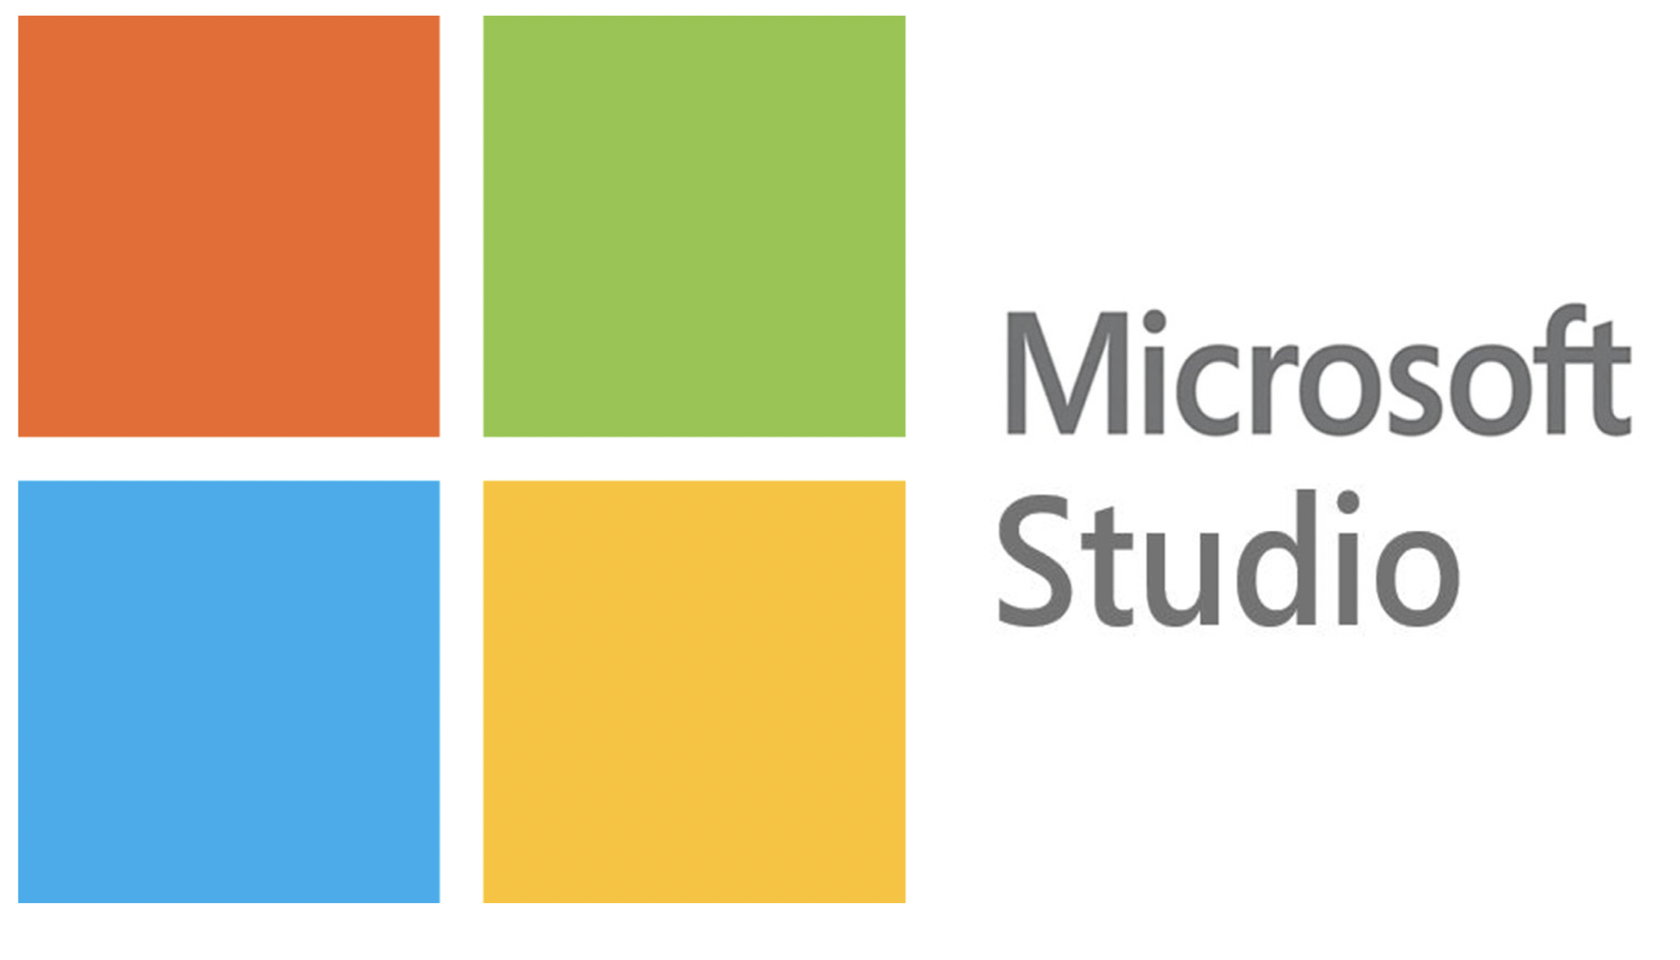

# Microsoft Movie Studio Recommendations

## Overview

This project uses data analysis to understand the performance of movie productions through various performance metrics in an effort to inform Microsoft executives about the most financially viable opportunities to enter the movie industry.

## Business Understanding

In 2019, prior to the pandemic, movie box office sales were at \\$11B, and in that same year there were over 1 billion tickets sold to the various films released at the time. The industry is recovering as we grow in our understanding of how to navigate the current environment with the coronavirus still prevalent. This year, box office sales are projected to be in excess of $6B with almost 750M tickets sold. (The numbers - https://www.the-numbers.com/market/)

The leadership of Microsoft is eager to learn about the potential to enter the movie industry with financial success in the near term. This analysis works to provide insight into important metrics of financial and public interest performance within the movie industry to better inform the Microsoft executive team as they determine their clear path forward to be a new entrant into the well established movie industry.

## Data Understanding

The information necessary to complete this detailed data analysis is gathered by various respected industry organizations. The datasets available for this analysis were sourced from the resources listed below:

 - [Box Office Mojo](https://www.boxofficemojo.com)
     * This dataset includes information about movie financial performance with gross domestic and foreign box office sales. The dataset includes information for 3,387 different titles.
 - [Rotten Tomatoes](https://www.rottentomatoes.com)
     * Movie info dataset: This dataset includes information regarding a synopsis, runtime, the director and writer team, release date (Theater and DVD), the production studio, genre, and the rating of the film. Altogether, the dataset includes information for 1,560 different titles.
     * Reviews dataset: This dataset includes information for movie reviews and ratings, along with the critic who is reviewing. In total, this data set provides information for 54,432 entries.
 - [TheMovieDB](https://www.themoviedb.org)
     * This dataset includes information about the genre, language, popularity, and release date of the various movies represented. The dataset includes 26,517 entries.
 - [The Numbers](https://www.the-numbers.com)
     * This dataset includes information about the release date, production budget, and the domestic and international gross sales. The dataset includes 5,782 entries.
 - [IMDB](https://www.imdb.com)
     * Principals: This dataset relationally connects to the other datasets from IMDB through movie ID, and person ID. This data set also include information particular to a persons role (e.g. if an actress is listed the category column shares the name of their character). This dataset has 1,028,186 entries
     * Known for: This data set provides a list of each person available from the principals dataset and connects them to a movie that they are known for. In total this dataset has 1,638,259 entries.
     * Directors | Writers: These data sets house information for the writers and directors of films and what films they are associated with. Directors has 291,174 entries and writers has 255,873 entries.
     * Persons: This dataset includes personal identifiable information such a persons birth and death year along with their profession. This dataset includes 606,648 entries.
     * Movie Basics: This dataset includes information to identify a movie's foundational details such as the year it was released, the runtime and the genre of the film. This dataset has 146,144 entries. 
     * Movie Ratings: This dataset includes information about movie rating and the number of votes received by reviewers. This dataset includes 73,856 entries.
     * Movie Akas: This dataset includes information about the movie region, language, type and attribute. This dataset includes 331,703 entries.

Below, we will further explore the information available from the datasets that will be used to better understand the critical metrics of performance that will inform the Microsoft executive teams next steps.

### Loading Data

In [1]:
# import the necessary support packages to manipulate the available information within the datasets 
import pandas as pd
import numpy as np

#### Box Office Mojo

In [2]:
# load the box office mojo csv file as a pandas dataframe
box_office_mojo = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [3]:
# look at the information within the box office mojo dataset
box_office_mojo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


We now understand that the Box Office Mojo dataset has 5 columns of information that we have available to us to use for the analysis project. It is important to note that there are 3 data types represented in this dataset. Most importantly as we approach the data cleaning steps of this analysis we will want to critically look at the null values throughout the dataset. We can see that the title and year columns are fully represented with 3,387 entries, though the foreign_gross, domestic_gross, and studio columns have entries that are empty. Once we are to the data cleaning stage looking into the missing data will allow us to better understand how to address the empty cells.

In [4]:
# look at the first 5 rows of the box office mojo dataset
box_office_mojo.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Now we can begin to see the data that is available to purposefully assess the business problem. Now we will duplicate this process for the 4 additional datasets below

#### Rotten Tomatoes

In [5]:
# load the rotten tomatoes movie info csv file as a pandas dataframe
RT_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')

In [6]:
# look at the information within the rotten tomatoes movie info dataset
RT_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [7]:
# look at the first 5 rows of the rotten tomoatoes movie info dataset
RT_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [8]:
# load the rotten tomatoes reviews csv file as a pandas dataframe
RT_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding= 'unicode_escape')

In [9]:
# look at the information within the rotten tomatoes reviews dataset
RT_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [10]:
# look at the first 5 rows of the rotten tomoatoes reviews dataset
RT_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


#### The Movie Database

In [11]:
# load the the movie database csv file as a pandas dataframe
movie_database = pd.read_csv('zippedData/tmdb.movies.csv.gz', index_col = 0)

In [12]:
# look at the information within the movie database dataset
movie_database.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [13]:
# look at the first 5 rows of the movie database dataset
movie_database.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


#### The Numbers

In [14]:
# load the the numbers movie budget csv file as a pandas dataframe
TN_movie_budget = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [15]:
# look at the information within the numbers movie budget dataset
TN_movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [16]:
# look at the first 5 rows of the numbers movie budget dataset
TN_movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


#### IMDB
The IMDB database is a dataframe that we will query through SQL to look into the layout of the data further. The data available through this database is summarized below in the Movie Data ERD image. 

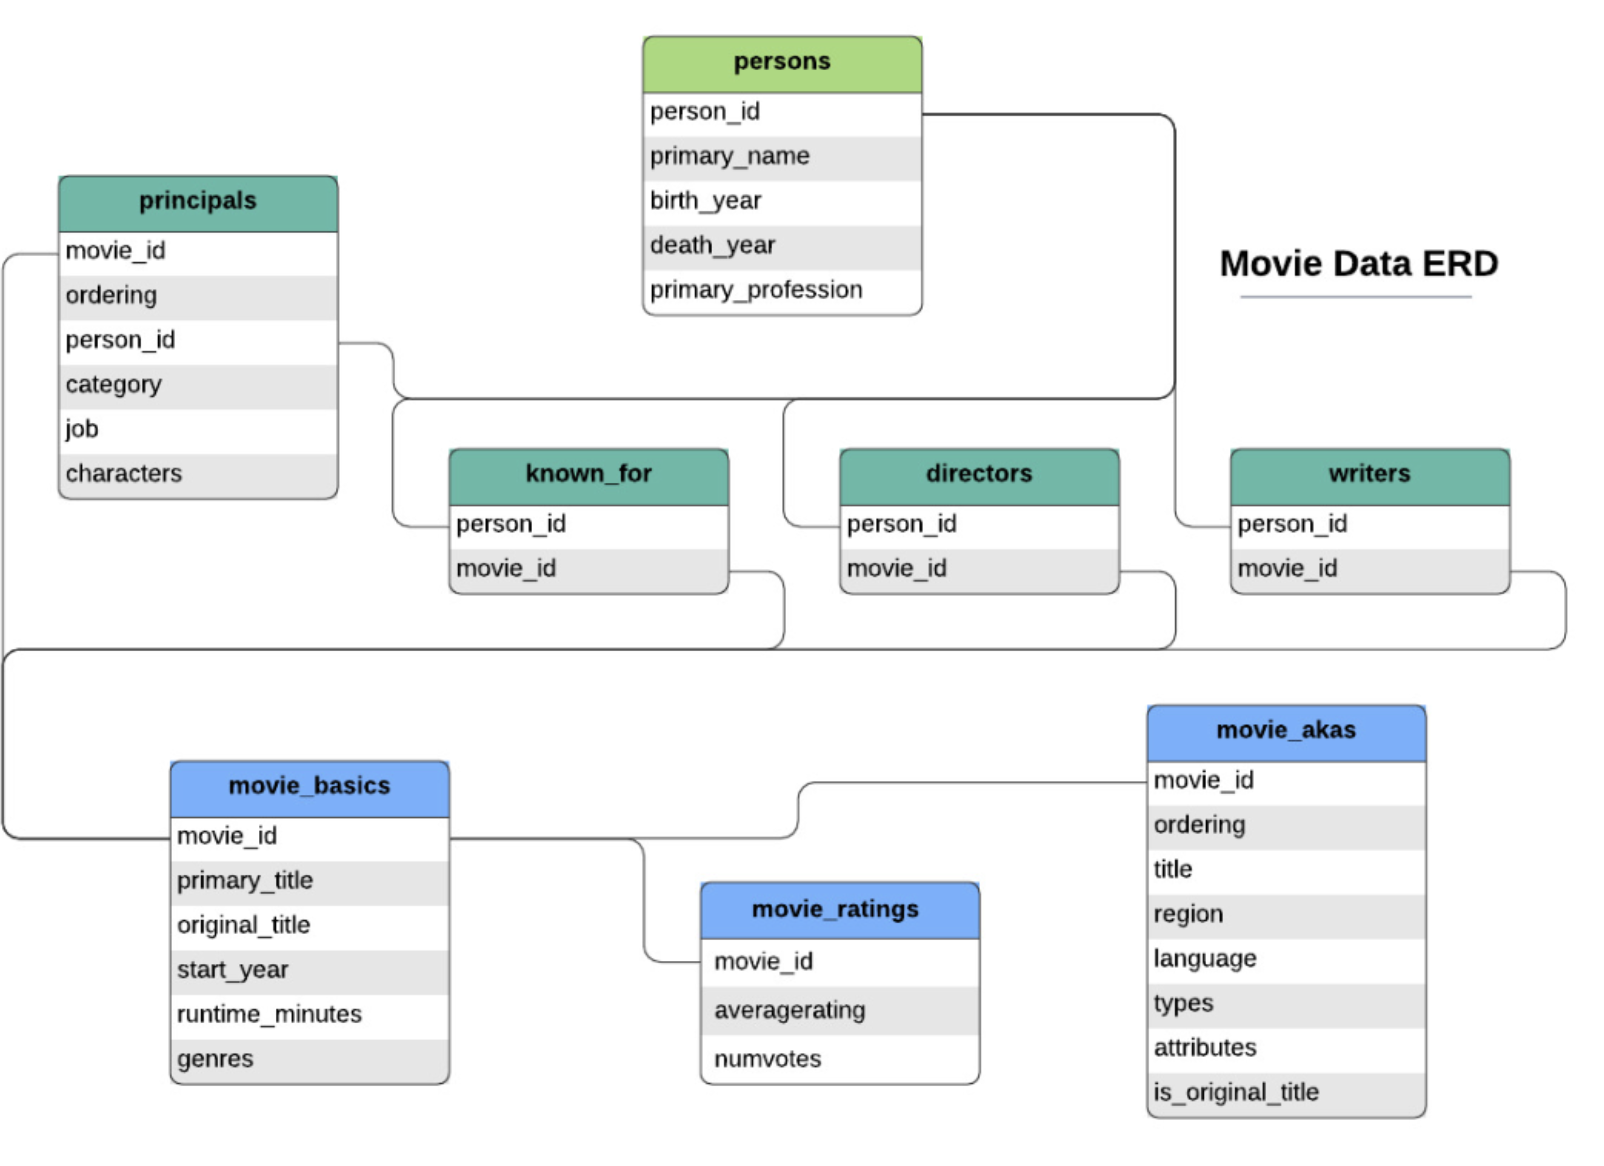

Below, we will further explore the information available from the IMDB datasets that will be used to better understand the critical metrics of performance that will inform the Microsoft executive teams next steps. We will only further explore the datasets that are anticipated to be used in the scope of this analysis. 

In [17]:
# import the necessary support packages to manipulate the available information within the dataset
import sqlite3

# create a connection through SQLite to the stored dataset
conn = sqlite3.connect('zippedData/im.db')

In [18]:
# look at the first 5 rows of the movie basics dataset
q1 = """SELECT * 
          FROM movie_basics;
"""
IMDB_movie_basics = pd.read_sql(q1, conn)
IMDB_movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [19]:
# look at the information within the movie basics dataset
IMDB_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [20]:
# look at the first 5 rows of the movie ratings dataset
q2 = """SELECT * 
          FROM movie_ratings;
"""
IMDB_movie_ratings = pd.read_sql(q2, conn)
IMDB_movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [21]:
# look at the information within the movie rating dataset
IMDB_movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [22]:
# look at the first 5 rows of the persons dataset
q3 = """SELECT * 
          FROM persons;
"""
IMDB_persons = pd.read_sql(q3, conn)
IMDB_persons.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [23]:
# look at the information within the persons dataset
IMDB_persons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB


In [24]:
# look at the first 5 rows of the principals dataset
q4 = """SELECT * 
          FROM principals;
"""
IMDB_principals = pd.read_sql(q4, conn)
IMDB_principals.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [25]:
# look at the information within the writers dataset
IMDB_principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movie_id    1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   person_id   1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


### Data Cleaning & Feature Engineering

It is important to ensure that the data used in this and any analysis is thoughtful and reliable in an effort to instill confidence in the recommendations that are created as a result of the analysis. In this step we will work to remove missing data values and ensure that the data we are working with is compatible and consistent to allow for true representation of the metrics to be measured and assessed.

In this analysis, we will utilize the IMDB and the Numbers Movie Budget datasets. We will work through cleaning these datasets below.



In [26]:
# check the numbers dataset for null entries
TN_movie_budget.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [27]:
# check the IMBD movie ratings dataset for null entries
IMDB_movie_ratings.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [28]:
# check the IMBD movie basics dataset for null entries
IMDB_movie_basics.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [29]:
# check the IMBD persons dataset for null entries
IMDB_persons.isna().sum()

person_id                  0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
dtype: int64

In [30]:
# check the IMBD principals dataset for null entries
IMDB_principals.isna().sum()

movie_id           0
ordering           0
person_id          0
category           0
job           850502
characters    634826
dtype: int64

Above, the movie budget dataset and the IMDB movie ratings dataset does not appear to have any null entries, while we can see that there are null entries that we will need to address in the movie basics, persons, and principals datasets.

### Drop Unused Columns

Within the IMDB movie basics dataset there are three columns of data that have missing values. From the above information we can see that the IMDB movie basics dataset has over 140K rows of data. Original title is missing 21 entries, compared to the large volume of data represented, generally this level of missing data would not significantly impact results. Although, this field is an object and cannot be normalized by using a mean to better represent the data more wholly. In the future analysis the original title is not utilized, it is assumed that the best path forward for this field is to remove the column completely since it will not impact further analysis.

As it relates to the runtime_minutes, this field is numerical as a float so we could normalize the data by calculating the mean or mode and use that to represent the missing fields, though similar to the original title, this data is not critical to scope of this analysis and can be removed from the dataset. 

We will use similar logic to remove unused columns from the persons, and principals datasets as well.

In [31]:
# look at the number of null entries for each column within the movie basics dataset
IMDB_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [32]:
# drop columns with missing values
IMDB_movie_basics.drop(columns = ['original_title', 'runtime_minutes'], inplace=True )

In [33]:
# check that the columns have been removed
IMDB_movie_basics.isna().sum()

movie_id            0
primary_title       0
start_year          0
genres           5408
dtype: int64

In [34]:
# look at the number of null entries for each column within the persons dataset
IMDB_persons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB


In [35]:
# drop columns with missing values
IMDB_persons.drop(columns = ['birth_year', 'primary_profession'], inplace=True )

In [36]:
# check that the columns have been removed
IMDB_persons.isna().sum()

person_id            0
primary_name         0
death_year      599865
dtype: int64

In [37]:
# look at the number of null entries for each column within the pricipals dataset
IMDB_principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movie_id    1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   person_id   1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [38]:
# drop columns with missing values
IMDB_principals.drop(columns = ['job', 'characters'], inplace=True )

In [39]:
# check that the columns have been removed
IMDB_principals.isna().sum()

movie_id     0
ordering     0
person_id    0
category     0
dtype: int64

### Dropping Unused Rows

One significant area of our focus for the scope of this analysis is on the financial and public interest performance of movies based on genre. Given the importance of ensuring this information is handled correctly for the viability of proper analysis it is critical to be thoughtful about how to proceed with addressing the 5,408 missing values within this column.

Special Note: Although the persons dataset has a number of null entries in the death year column We will not remove those entries as the assumption would be that those persons without a death year are still alive. This will be valuable information later on in our analysis as we look to identify current directors and writers to partner with.

In [40]:
# caluculate the % of the entries that have missing values
print (round(len(IMDB_movie_basics[IMDB_movie_basics.genres.isna()]) / len(IMDB_movie_basics)*100, 2),
       '% of the entries in the dataset have missing values in the genre column')

3.7 % of the entries in the dataset have missing values in the genre column


Given the low % representation of missing data, it is safe to say that the reliability or trustworthiness of the data that is represented is still viable. Given that the data type is an object, it is not possible to calculate a mean or mode value, so the next viable option is to drop the rows where the genre column is empty.

In [41]:
# remove all remaining rows with missing values
IMDB_movie_basics = IMDB_movie_basics.dropna()

# check the dataset to see if there are any remaing missing values
IMDB_movie_basics.isna().sum()

movie_id         0
primary_title    0
start_year       0
genres           0
dtype: int64

## Data Analysis & Recommendations

### Business Recommendation 1: Optimizing Portfolio Success Through Financial Performance

In this portion of the analysis we will look at the following elements to better understand the movies that are most profitable to better inform the Microsoft executive teams approach towards entering the movie industry. To accomplish this we will focus on:

 - Genre success over time measured by their return on investment
 - The data set that could be helpful for interpreting financial performance will be further explored
     - The Numbers
     - IMDB Movie Basics, Persons, Principals, and Movie Ratings
     
First we will take a look at the genre with the highest frequency. Initially, and very basically, one would assume that the most frequent occurrence would lend itself to the most popular type of movie in terms of public interest and assumed to be financial performance. 

It is important to note that movies often times are categorized with multiple genres, so the information represented is not a one to one relationship with movies.

To allow for further exploration of genres in a meaningful way, we will need to turn the genres column within the IMDB Movie Basics dataset into a string and then work to separate the newly created genres_split column by comma. We will use the explode method to represent a movie with multiple genres on a separate row. 

In [42]:
# turn the genres column into a string which will be used to be sepearated by comma 
IMDB_movie_basics['genres_split'] = IMDB_movie_basics.genres.str.split(',')

In [43]:
# look at the frist 5 rows of the movie basics dataset to see the new column added
IMDB_movie_basics.head()

,movie_id,primary_title,start_year,genres,genres_split
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama","[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama","[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,2018,Drama,[Drama]
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama","[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]"


In [44]:
# separate the genres_split column by comma to be better analyzed
exploded_IMDB_basics = IMDB_movie_basics.explode('genres_split')
exploded_IMDB_basics.head()

,movie_id,primary_title,start_year,genres,genres_split
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",Action
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",Crime
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",Drama
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",Biography
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",Drama


In [45]:
# find the proportion of each genres representation in the movie basics dataset
genre_count = exploded_IMDB_basics.groupby('genres_split')['genres'].count()
genre_sum = sum(genre_count)
genre_count_proportion = round(genre_count / genre_sum * 100, 2)
genre_count_proportion

genres_split
Action          4.50
Adult           0.01
Adventure       2.82
Animation       1.22
Biography       3.80
Comedy         11.03
Crime           2.94
Documentary    22.50
Drama          21.73
Family          2.71
Fantasy         1.53
Game-Show       0.00
History         2.71
Horror          4.71
Music           1.88
Musical         0.62
Mystery         2.03
News            0.68
Reality-TV      0.04
Romance         4.08
Sci-Fi          1.47
Short           0.00
Sport           0.97
Talk-Show       0.02
Thriller        5.18
War             0.61
Western         0.20
Name: genres, dtype: float64

Earlier in this analysis we created a query to look at the IMDB movie ratings table. The table is listed below as a refresher.

In [46]:
# look at the first 5 rows of teh IMDB movie ratings dataset
IMDB_movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In an effort to understand public interest in movies by genre, we will merge the exploded movie basics table with the movie ratings table to then further analyze and visualize this metric

#### Merge IMDB Movie Basics with Movie Ratings

In [47]:
# set the index column for IMDB movie ratings
IMDB_movie_ratings.set_index('movie_id', inplace=True)
IMDB_movie_ratings.head()

,averagerating,numvotes
movie_id,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21


In [48]:
# set the index column for exploded IMDB basics
exploded_IMDB_basics.set_index('movie_id', inplace=True)
exploded_IMDB_basics.head()

,primary_title,start_year,genres,genres_split
movie_id,,,,
tt0063540,Sunghursh,2013,"Action,Crime,Drama",Action
tt0063540,Sunghursh,2013,"Action,Crime,Drama",Crime
tt0063540,Sunghursh,2013,"Action,Crime,Drama",Drama
tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",Biography
tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",Drama


In [49]:
IMDB_basics_ratings = exploded_IMDB_basics.join(IMDB_movie_ratings, how = 'left')
IMDB_basics_ratings.head()

,primary_title,start_year,genres,genres_split,averagerating,numvotes
movie_id,,,,,,
tt0063540,Sunghursh,2013,"Action,Crime,Drama",Action,7.0,77.0
tt0063540,Sunghursh,2013,"Action,Crime,Drama",Crime,7.0,77.0
tt0063540,Sunghursh,2013,"Action,Crime,Drama",Drama,7.0,77.0
tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",Biography,7.2,43.0
tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",Drama,7.2,43.0


Later on in this analysis we will also benefit from having information from the principals and persons datasets. We will join them now with the ratings and basics datasets to have one comprehensive list from the IMDB Dataset that we will continue to work from throughout this analysis

In [50]:
# set the index column for principals
IMDB_principals.set_index('person_id', inplace=True)
IMDB_principals.head()

,movie_id,ordering,category
person_id,,,
nm0246005,tt0111414,1,actor
nm0398271,tt0111414,2,director
nm3739909,tt0111414,3,producer
nm0059247,tt0323808,10,editor
nm3579312,tt0323808,1,actress


In [51]:
# set the index column for persons
IMDB_persons.set_index('person_id', inplace=True)
IMDB_persons.head()

,primary_name,death_year
person_id,,
nm0061671,Mary Ellen Bauder,NaN
nm0061865,Joseph Bauer,NaN
nm0062070,Bruce Baum,NaN
nm0062195,Axel Baumann,NaN
nm0062798,Pete Baxter,NaN


In [52]:
# join pricipals and persons
principals_persons = IMDB_principals.join(IMDB_persons, how = 'left')
principals_persons.head()

,movie_id,ordering,category,primary_name,death_year
person_id,,,,,
nm0000002,tt1626811,4,self,Lauren Bacall,2014.0
nm0000002,tt0858500,2,actress,Lauren Bacall,2014.0
nm0000002,tt1368858,1,actress,Lauren Bacall,2014.0
nm0000002,tt2053352,4,archive_footage,Lauren Bacall,2014.0
nm0000003,tt2004245,1,archive_footage,Brigitte Bardot,NaN


In [53]:
# set the index column for pricipals_persons
principals_persons.set_index('movie_id', inplace=True)
principals_persons.head()

,ordering,category,primary_name,death_year
movie_id,,,,
tt1626811,4,self,Lauren Bacall,2014.0
tt0858500,2,actress,Lauren Bacall,2014.0
tt1368858,1,actress,Lauren Bacall,2014.0
tt2053352,4,archive_footage,Lauren Bacall,2014.0
tt2004245,1,archive_footage,Brigitte Bardot,NaN


In [54]:
IMDB_full_details = IMDB_basics_ratings.join(principals_persons, how = 'left')
IMDB_full_details.head()

,primary_title,start_year,genres,genres_split,averagerating,numvotes,ordering,category,primary_name,death_year
movie_id,,,,,,,,,,
tt0063540,Sunghursh,2013,"Action,Crime,Drama",Action,7.0,77.0,10.0,composer,Naushad,2006.0
tt0063540,Sunghursh,2013,"Action,Crime,Drama",Action,7.0,77.0,6.0,writer,Abrar Alvi,2009.0
tt0063540,Sunghursh,2013,"Action,Crime,Drama",Action,7.0,77.0,8.0,writer,Gulzar,NaN
tt0063540,Sunghursh,2013,"Action,Crime,Drama",Action,7.0,77.0,1.0,actor,Dilip Kumar,NaN
tt0063540,Sunghursh,2013,"Action,Crime,Drama",Action,7.0,77.0,4.0,actor,Sanjeev Kumar,1985.0


#### Analyze Average Movie Ratings by Genre

In [55]:
# find the average rating of each genres representation in the movie basics dataset
ratings_mean = round(IMDB_full_details.groupby('genres_split')['averagerating'].mean(), 2)
ratings_mean

genres_split
Action         5.78
Adult          3.40
Adventure      6.11
Animation      6.25
Biography      7.10
Comedy         5.97
Crime          6.08
Documentary    7.33
Drama          6.38
Family         6.31
Fantasy        5.88
Game-Show      7.30
History        6.96
Horror         5.00
Music          7.03
Musical        6.46
Mystery        5.91
News           7.28
Reality-TV     6.10
Romance        6.13
Sci-Fi         5.46
Short          8.80
Sport          6.90
Talk-Show       NaN
Thriller       5.64
War            6.49
Western        5.84
Name: averagerating, dtype: float64

In [56]:
# import the necessary packages to complete data visualizations
import matplotlib.pyplot as plt
%matplotlib inline

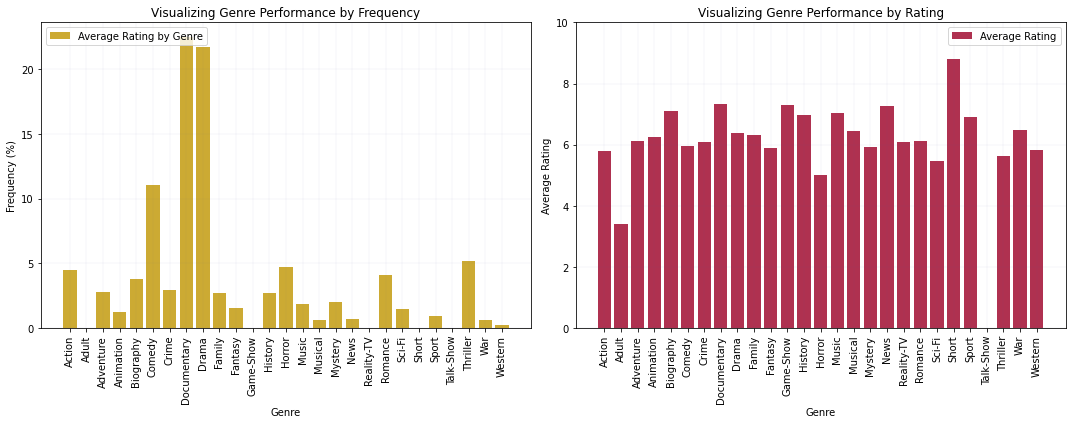

In [57]:
# plot a histogram to visualize movie average ratings and frequency of occurance based on genre

# create the plot with 2 figures side by side
fig, (ax1, ax2) = plt.subplots(figsize=(15, 6), ncols = 2)

# set the plot, format, and labels for the first bar graph measuring frequency of genres
ax1.bar(genre_count_proportion.index, genre_count_proportion.values,
       color = '#CCAA33', 
       align='center', 
       label = 'Average Rating by Genre')
ax1.set_ylabel('Frequency (%)')
ax1.set_xlabel('Genre')
ax1.set_title('Visualizing Genre Performance by Frequency')
ax1.tick_params(axis='x', labelrotation=90)
ax1.grid(color='#666699', alpha = .5, linestyle='-', linewidth=0.1)
ax1.legend(loc='upper left')

# set the plot, format, and labels for the second bar graph measuring average rating of genres
ax2.bar(ratings_mean.index, ratings_mean.values,
       color = '#AF3150', 
       align='center', 
       label = 'Average Rating')
ax2.set_ylabel('Average Rating')
ax2.set_xlabel('Genre')
ax2.set_title('Visualizing Genre Performance by Rating')
ax2.tick_params(axis='x', labelrotation=90)
major_ticks = np.arange(0, 12, 2)
ax2.set_yticks(major_ticks)
ax2.grid(color='#666699', alpha = .5, linestyle='-', linewidth=0.1)
ax2.legend(loc = 'upper right')

# format the layout and display the graphs
fig.tight_layout()
plt.show()

Based on the interpretation of the visualizations above we would assume the following:
 - Documentary and Drama films were the most frequently created films. One could make an assumption that this is a result of public interest and reception of these types of films, which would then likely lead to profitability of this type of genre of film
 - Short films have the highest average rating on a ten point scale. This would allow one to believe that since short films have a high rating they would likely be well received and potentially profitable.

We will continue to explore these assumptions throughout this analysis.

#### Merge IMDB Movie Basics to The Numbers Movie Budget Dataset

To further analyze movie performance financially we will connect the IMDB full details list with the Numbers Movie Budget Dataset. The numbers dataset will allow us to compare their listing of production budget and gross sales to better understand the profitability of genres more broadly.

In [58]:
# merge the IMDB full details list with the Number Movie Budget data
# merging with the Numbers data on the left since this dataset has fewer movies represented
# we will be limited to their available information
full_movie_details = TN_movie_budget.merge(IMDB_full_details, 
                     left_on='movie', right_on='primary_title')
full_movie_details.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,primary_title,start_year,genres,genres_split,averagerating,numvotes,ordering,category,primary_name,death_year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Avatar,2011,Horror,Horror,6.1,43.0,1.0,actress,Ai Hashimoto,NaN
1,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Avatar,2011,Horror,Horror,6.1,43.0,6.0,writer,Yûsuke Yamada,NaN
2,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Avatar,2011,Horror,Horror,6.1,43.0,2.0,actress,Rikako Sakata,NaN
3,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Avatar,2011,Horror,Horror,6.1,43.0,3.0,actress,Nako Mizusawa,NaN
4,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Avatar,2011,Horror,Horror,6.1,43.0,8.0,composer,Hideki Ikari,NaN


In [59]:
# talk about non null - I do need to figure out why that one genre is empty in the visualization above
full_movie_details.isna().sum()

id                       0
release_date             0
movie                    0
production_budget        0
domestic_gross           0
worldwide_gross          0
primary_title            0
start_year               0
genres                   0
genres_split             0
averagerating         7802
numvotes              7802
ordering                24
category                24
primary_name            29
death_year           68252
dtype: int64

In [60]:
# drop unused columns and columns with missing values
full_movie_details.drop(columns = ['primary_title', 'start_year', 'averagerating', 'numvotes', 'ordering'], inplace=True )

In [61]:
# drop rows with missing values in category since it cannot be normalized
# we will not remove null entries in death year as we want to preserve those entries to analyze 
# things further with actively alive writers and directors
full_movie_details.dropna(subset=['death_year'])

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres,genres_split,category,primary_name,death_year
42,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350","Action,Adventure,Sci-Fi",Action,writer,Jack Kirby,1994.0
43,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350","Action,Adventure,Sci-Fi",Action,writer,Stan Lee,2018.0
47,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350","Action,Adventure,Sci-Fi",Action,writer,Dave Cockrum,2006.0
52,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350","Action,Adventure,Sci-Fi",Adventure,writer,Jack Kirby,1994.0
53,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350","Action,Adventure,Sci-Fi",Adventure,writer,Stan Lee,2018.0
...,...,...,...,...,...,...,...,...,...,...,...
67850,83,"Mar 28, 2008",Happy Valley,"$250,000","$67,665","$67,665","Documentary,Drama,Sport",Drama,archive_footage,Joe Paterno,2012.0
67860,83,"Mar 28, 2008",Happy Valley,"$250,000","$67,665","$67,665","Documentary,Drama,Sport",Sport,archive_footage,Joe Paterno,2012.0
68764,89,"Mar 21, 2014",Cheap Thrills,"$100,000","$59,424","$59,424","Comedy,Crime,Drama",Comedy,writer,Roald Dahl,1990.0
68774,89,"Mar 21, 2014",Cheap Thrills,"$100,000","$59,424","$59,424","Comedy,Crime,Drama",Crime,writer,Roald Dahl,1990.0


In [62]:
full_movie_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69673 entries, 0 to 69672
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 69673 non-null  int64  
 1   release_date       69673 non-null  object 
 2   movie              69673 non-null  object 
 3   production_budget  69673 non-null  object 
 4   domestic_gross     69673 non-null  object 
 5   worldwide_gross    69673 non-null  object 
 6   genres             69673 non-null  object 
 7   genres_split       69673 non-null  object 
 8   category           69649 non-null  object 
 9   primary_name       69644 non-null  object 
 10  death_year         1421 non-null   float64
dtypes: float64(1), int64(1), object(9)
memory usage: 6.4+ MB


In [63]:
# given that movies are represented on multiple lines since they have multiple genres 
# associated with a single film, we will not look to understand how many unique
# films are in this dataset
distinct = len(pd.unique(full_movie_details['movie']))
print("Number of unique movies that we will analyze further:", distinct)

Number of unique movies that we will analyze further: 2299


In [64]:
# look at the merged dataset
full_movie_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69673 entries, 0 to 69672
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 69673 non-null  int64  
 1   release_date       69673 non-null  object 
 2   movie              69673 non-null  object 
 3   production_budget  69673 non-null  object 
 4   domestic_gross     69673 non-null  object 
 5   worldwide_gross    69673 non-null  object 
 6   genres             69673 non-null  object 
 7   genres_split       69673 non-null  object 
 8   category           69649 non-null  object 
 9   primary_name       69644 non-null  object 
 10  death_year         1421 non-null   float64
dtypes: float64(1), int64(1), object(9)
memory usage: 6.4+ MB


Above we can see that the production budget, domestic gross, and worldwide gross are an object type, though we would like for them to be represented as an integer. Also release date is an object, we will want to convert this to a data format and then separate into a month a year column to be used in further analysis. We want them to converted to an integer. We will address this below.

In [65]:
# convert production budget from object to integer
full_movie_details['production_budget'] = full_movie_details['production_budget'].str.replace(',', '').str.replace('$', '').astype(int)

In [66]:
# convert domestic gross from object to integer
full_movie_details['domestic_gross'] = full_movie_details['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(int)

In [67]:
# convert worldwide gross from object to integer
full_movie_details['worldwide_gross'] = full_movie_details['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(int)

In [68]:
# convert release date from object to date format
full_movie_details['release_date'] = pd.to_datetime(full_movie_details['release_date'])

In [69]:
# add a new column that only includes month from release date
full_movie_details['month'] = pd.DatetimeIndex(full_movie_details['release_date']).month

In [70]:
# add a new column that only includes the day from release date
full_movie_details['day'] = pd.DatetimeIndex(full_movie_details['release_date']).day

In [71]:
# check the full movie details dataset for no null entries, the adjustment of the type and the 
# new columns
full_movie_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69673 entries, 0 to 69672
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 69673 non-null  int64         
 1   release_date       69673 non-null  datetime64[ns]
 2   movie              69673 non-null  object        
 3   production_budget  69673 non-null  int64         
 4   domestic_gross     69673 non-null  int64         
 5   worldwide_gross    69673 non-null  int64         
 6   genres             69673 non-null  object        
 7   genres_split       69673 non-null  object        
 8   category           69649 non-null  object        
 9   primary_name       69644 non-null  object        
 10  death_year         1421 non-null   float64       
 11  month              69673 non-null  int64         
 12  day                69673 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(5)
memory 

In [72]:
full_movie_details.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres,genres_split,category,primary_name,death_year,month,day
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,Horror,Horror,actress,Ai Hashimoto,NaN,12,18
1,1,2009-12-18,Avatar,425000000,760507625,2776345279,Horror,Horror,writer,Yûsuke Yamada,NaN,12,18
2,1,2009-12-18,Avatar,425000000,760507625,2776345279,Horror,Horror,actress,Rikako Sakata,NaN,12,18
3,1,2009-12-18,Avatar,425000000,760507625,2776345279,Horror,Horror,actress,Nako Mizusawa,NaN,12,18
4,1,2009-12-18,Avatar,425000000,760507625,2776345279,Horror,Horror,composer,Hideki Ikari,NaN,12,18


#### Discover the highest ROI by genre

In [73]:
# find the average prodcution budget of each genres representation 
# in the merged full_movie_details dataset
prodcution_mean_genres = round(full_movie_details.groupby('genres_split')['production_budget'].
                               mean(), 0)
prodcution_mean_genres

genres_split
Action         63708921.0
Adventure      90514577.0
Animation      83588220.0
Biography      25275171.0
Comedy         33514731.0
Crime          27605277.0
Documentary    23185222.0
Drama          23462966.0
Family         49666913.0
Fantasy        67400869.0
History        35004814.0
Horror         18720511.0
Music          15748796.0
Musical        38792835.0
Mystery        22412514.0
News           26733333.0
Reality-TV      1000000.0
Romance        20458353.0
Sci-Fi         67599381.0
Sport          24648541.0
Thriller       27219172.0
War            24132955.0
Western        40167840.0
Name: production_budget, dtype: float64

In [74]:
# find the average domestic prodcution of each genres representation 
# in the merged full_movie_details dataset
domestic_gross_mean_genres = round(full_movie_details.groupby('genres_split')['domestic_gross'].
                                   mean(), 0)
domestic_gross_mean_genres

genres_split
Action          68464668.0
Adventure      105341985.0
Animation      115016438.0
Biography       33811248.0
Comedy          47018595.0
Crime           30175903.0
Documentary     28277462.0
Drama           28214667.0
Family          71055112.0
Fantasy         81538728.0
History         34883363.0
Horror          28542869.0
Music           30047837.0
Musical        100341883.0
Mystery         31575349.0
News            14858212.0
Reality-TV             0.0
Romance         28986001.0
Sci-Fi          87448791.0
Sport           34721266.0
Thriller        32262474.0
War             22717227.0
Western         34718831.0
Name: domestic_gross, dtype: float64

In [75]:
# find the average worldwide prodcution of each genres representation 
# in the merged full_movie_details dataset
global_gross_mean_genres = round(full_movie_details.groupby('genres_split')['worldwide_gross'].
                                   mean(), 0)
global_gross_mean_genres

genres_split
Action         182933091.0
Adventure      294202626.0
Animation      312267768.0
Biography       69683462.0
Comedy         104108755.0
Crime           65019627.0
Documentary     57368919.0
Drama           59314101.0
Family         168139526.0
Fantasy        218614818.0
History         74835028.0
Horror          64106192.0
Music           64019916.0
Musical        221427300.0
Mystery         69569916.0
News            52699432.0
Reality-TV             0.0
Romance         61361652.0
Sci-Fi         234857981.0
Sport           68123761.0
Thriller        78522374.0
War             51062352.0
Western         66656409.0
Name: worldwide_gross, dtype: float64

plot a histogram to visualize movie budget and the domestic gross production based on genre

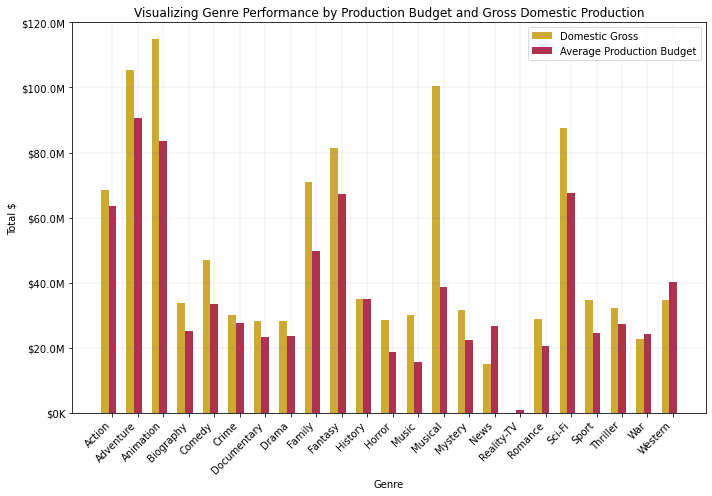

In [76]:
#plot a histogram to visualize movie budget and the domestic gross production based on genre

# this function is used for formatting the y axis without scientific notation
# cite: https://matplotlib.org/stable/tutorials/introductory/lifecycle.html#sphx-glr-tutorials-introductory-lifecycle-py
def currency(x, pos):
    if x >= 1e6:
        s = '${:1.1f}M'.format(x * 1e-6)
    else:
        s = '${:1.0f}K'.format(x * 1e-3)
    return s

# establish x values for a multi dataset visualization
# cite: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
labels = domestic_gross_mean_genres.index
x = np.arange(len(labels))

# set the plot, format, and labels
fig, ax = plt.subplots(figsize=(10,7))
bar_width = 0.3
ax1 = ax.bar(x - bar_width / 2, 
             domestic_gross_mean_genres.values,
             width = 0.3, 
             color = '#CCAA33', 
             label='Domestic Gross')
ax2 = ax.bar(x + bar_width / 2, 
             prodcution_mean_genres.values, 
             width = 0.3,
             color = '#AF3150',
             label='Average Production Budget')
ax.yaxis.set_major_formatter(currency)
plt.ylim(0,120000000)
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(domestic_gross_mean_genres.index.unique())
plt.setp(ax.get_xticklabels(), rotation=45, ha='right') # cite: https://pythonguides.com/matplotlib-x-axis-label/
ax.grid(color='#666699', linestyle='-', linewidth=0.1)
ax.set_xlabel('Genre')
ax.set_ylabel('Total $')

# Add title and legends
ax.set_title('Visualizing Genre Performance by Production Budget and Gross Domestic Production')
ax.legend()

# format the layout and display the visualization
fig.tight_layout()
plt.show()

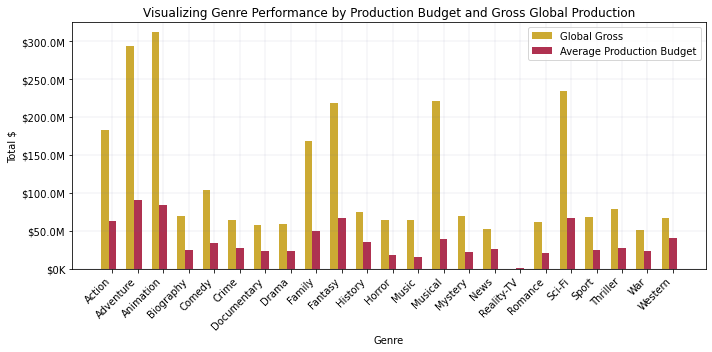

In [77]:
#plot a histogram to visualize movie budget and the global gross production based on genre

# this function is used for formatting the y axis without scientific notation
# cite: https://matplotlib.org/stable/tutorials/introductory/lifecycle.html#sphx-glr-tutorials-introductory-lifecycle-py
def currency(x, pos):
    if x >= 1e6:
        s = '${:1.1f}M'.format(x * 1e-6)
    else:
        s = '${:1.0f}K'.format(x * 1e-3)
    return s

# establish x values for a multi dataset visualization
# cite: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
labels = global_gross_mean_genres.index
x = np.arange(len(labels))

# set the plot, format, and labels
fig, ax = plt.subplots(figsize=(10,5))
bar_width = 0.3
ax1 = ax.bar(x - bar_width / 2, 
             global_gross_mean_genres.values,
             width = 0.3, 
             color = '#CCAA33', 
             label='Global Gross')
ax2 = ax.bar(x + bar_width / 2, 
             prodcution_mean_genres.values, 
             width = 0.3,
             color = '#AF3150',
             label='Average Production Budget')
ax.yaxis.set_major_formatter(currency)
plt.ylim(0,325000000)
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(global_gross_mean_genres.index.unique())
plt.setp(ax.get_xticklabels(), rotation=45, ha='right') # cite: https://pythonguides.com/matplotlib-x-axis-label/
ax.grid(color='#666699', linestyle='-', linewidth=0.1)
ax.set_xlabel('Genre')
ax.set_ylabel('Total $')


# Add title and legends
ax.set_title('Visualizing Genre Performance by Production Budget and Gross Global Production')
ax.legend()

# format the layout and display the visualization
fig.tight_layout()
plt.show()

Above we can see that a higher budget lends itself to a higher production, particularly when you look at global production. Though this does not tell us a full story - we need to evaluate return on investment to understand the full scope of profitability.

#### Calculate Return on Investment

Return on investment is a % measurement to interpret how much profit was gained from the about of money initially invested to create the movies. It is calucalted as follows

ROI = ((amount gained - amount spent)/amount spent) * 100

In [78]:
# calculate return on investment by genre (domestic)
ROI_domestic = round(((domestic_gross_mean_genres - prodcution_mean_genres) / 
                      prodcution_mean_genres) * 100, 2)
ROI_domestic

genres_split
Action           7.46
Adventure       16.38
Animation       37.60
Biography       33.77
Comedy          40.29
Crime            9.31
Documentary     21.96
Drama           20.25
Family          43.06
Fantasy         20.98
History         -0.35
Horror          52.47
Music           90.79
Musical        158.66
Mystery         40.88
News           -44.42
Reality-TV    -100.00
Romance         41.68
Sci-Fi          29.36
Sport           40.87
Thriller        18.53
War             -5.87
Western        -13.57
dtype: float64

In [79]:
# calculate return on investment by genre (global)
ROI_global = round(((global_gross_mean_genres - prodcution_mean_genres) / 
                      prodcution_mean_genres) * 100, 2)
ROI_global

genres_split
Action         187.14
Adventure      225.03
Animation      273.58
Biography      175.70
Comedy         210.64
Crime          135.53
Documentary    147.44
Drama          152.80
Family         238.53
Fantasy        224.35
History        113.78
Horror         242.44
Music          306.51
Musical        470.79
Mystery        210.41
News            97.13
Reality-TV    -100.00
Romance        199.93
Sci-Fi         247.43
Sport          176.38
Thriller       188.48
War            111.59
Western         65.94
dtype: float64

In [80]:
# import the necessary support packages for the visualization below
import matplotlib.ticker as mtick

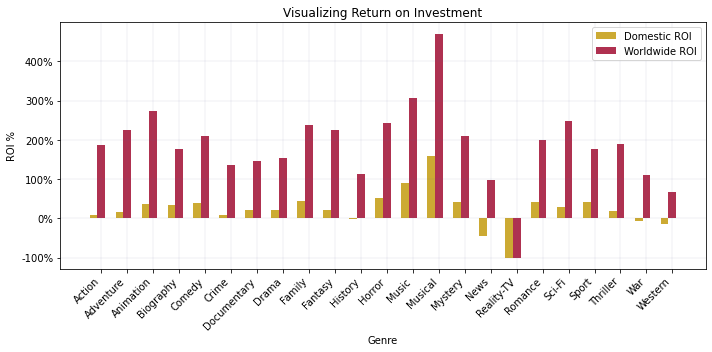

In [81]:
# establish x values for a multi dataset visualization
# cite: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
labels = ROI_domestic.index
x = np.arange(len(labels))

# set the plot, format, and labels
fig, ax = plt.subplots(figsize=(10,5))
bar_width = 0.3
ax1 = ax.bar(x - bar_width / 2, 
             ROI_domestic.values, 
             width = 0.3, 
             color = '#CCAA33',
             label ='Domestic ROI')  
        
ax2 = ax.bar(x + bar_width / 2, 
             ROI_global.values, 
             width = 0.3, 
             color = '#AF3150',
             label='Worldwide ROI')

# Add a legend to the plot
plt.setp(ax.get_xticklabels(), rotation=45, ha='right') # cite: https://pythonguides.com/matplotlib-x-axis-label/
ax.grid(color='#666699', linestyle='-', linewidth=0.1)
ax.set_xlabel('Genre')
xticks = mtick.FormatStrFormatter('%.0f%%')
ax.yaxis.set_major_formatter(xticks)
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(ROI_global.index.unique())
ax.set_ylabel('ROI %')

# Add title and legends
ax.legend()
ax.set_title('Visualizing Return on Investment')

# format the layout and display the visualization
fig.tight_layout()
plt.show()

# save figure to files
fig.savefig('/Users/laurenbrown/Documents/Flatiron/Phase_1/Project/Phase 1 Project_Lauren Brown/Images/ROI.png')

#### Recommendation

This analysis worked to explore the profitability of genres within the movie industry. As Microsoft looks to enter the movie industry, pursuing films that have proven their profitability over time offers the potential to pursue profitability more readily. In the above image we can see that the most profitable movie genres, in terms of average return on investment, are Musical, Music, and Animation films. As another layer of pursuing proven paths toward successful movie industry entry we will explore writers and directors who have proven profitability.

We will continue to explore these genres further in this analysis.

### Business Recommendation 2: Align with Prolific Director and Writer Teams

In this part of the analysis we will explore the profitability of directors. Those who have proven themselves to consistently perform at an elevated level. Given that Microsoft is an established and trusted organization with capital to spend on strong partnerships, aligning with directors and writers that can create impact will be critical. 

Below we will explore who those directors and writers are.

#### Directors

In [82]:
full_movie_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69673 entries, 0 to 69672
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 69673 non-null  int64         
 1   release_date       69673 non-null  datetime64[ns]
 2   movie              69673 non-null  object        
 3   production_budget  69673 non-null  int64         
 4   domestic_gross     69673 non-null  int64         
 5   worldwide_gross    69673 non-null  int64         
 6   genres             69673 non-null  object        
 7   genres_split       69673 non-null  object        
 8   category           69649 non-null  object        
 9   primary_name       69644 non-null  object        
 10  death_year         1421 non-null   float64       
 11  month              69673 non-null  int64         
 12  day                69673 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(5)
memory 

In [83]:
# remove directors that have passed away
alive_directors = full_movie_details.loc[full_movie_details['death_year'].isnull()]
alive_directors.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres,genres_split,category,primary_name,death_year,month,day
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,Horror,Horror,actress,Ai Hashimoto,NaN,12,18
1,1,2009-12-18,Avatar,425000000,760507625,2776345279,Horror,Horror,writer,Yûsuke Yamada,NaN,12,18
2,1,2009-12-18,Avatar,425000000,760507625,2776345279,Horror,Horror,actress,Rikako Sakata,NaN,12,18
3,1,2009-12-18,Avatar,425000000,760507625,2776345279,Horror,Horror,actress,Nako Mizusawa,NaN,12,18
4,1,2009-12-18,Avatar,425000000,760507625,2776345279,Horror,Horror,composer,Hideki Ikari,NaN,12,18


In [84]:
alive_directors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68252 entries, 0 to 69672
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 68252 non-null  int64         
 1   release_date       68252 non-null  datetime64[ns]
 2   movie              68252 non-null  object        
 3   production_budget  68252 non-null  int64         
 4   domestic_gross     68252 non-null  int64         
 5   worldwide_gross    68252 non-null  int64         
 6   genres             68252 non-null  object        
 7   genres_split       68252 non-null  object        
 8   category           68228 non-null  object        
 9   primary_name       68223 non-null  object        
 10  death_year         0 non-null      float64       
 11  month              68252 non-null  int64         
 12  day                68252 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(5)
memory 

In [85]:
# from the full movie details dataset sort by directors
category_type_director = ['director']

directors_groupby = alive_directors[alive_directors['category'].isin(category_type_director)]
directors_groupby.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres,genres_split,category,primary_name,death_year,month,day
7,1,2009-12-18,Avatar,425000000,760507625,2776345279,Horror,Horror,director,Atsushi Wada,NaN,12,18
15,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"Action,Adventure,Fantasy",Action,director,Rob Marshall,NaN,5,20
25,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"Action,Adventure,Fantasy",Adventure,director,Rob Marshall,NaN,5,20
35,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"Action,Adventure,Fantasy",Fantasy,director,Rob Marshall,NaN,5,20
48,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,"Action,Adventure,Sci-Fi",Action,director,Simon Kinberg,NaN,6,7


In [86]:
# find the average budget by director
directors_production_mean = round(directors_groupby.groupby('primary_name')['production_budget'].
                                   mean(), 0)

In [87]:
# find the average domestic gross sales by director
directors_domestic_gross_mean = round(directors_groupby.groupby('primary_name')['domestic_gross']
                                      .mean(), 0)

In [88]:
# find the average global gross sales by director
directors_global_mean = round(directors_groupby.groupby('primary_name')['worldwide_gross'].
                                 mean(), 0)

In [89]:
# calculate the ROI by director (domestic), only display the top 25
ROI_domestic_directors = round(((directors_domestic_gross_mean - directors_production_mean) / 
                                 directors_production_mean) * 100, 2).sort_values(ascending=False).nlargest(25)

In [90]:
# calculate the ROI by director (global), only display the top 25
ROI_global_directors = round(((directors_global_mean - directors_production_mean) / 
                               directors_production_mean) * 100, 2).sort_values(ascending=False).nlargest(25)

Visualize the ROI of top directors (domestic)

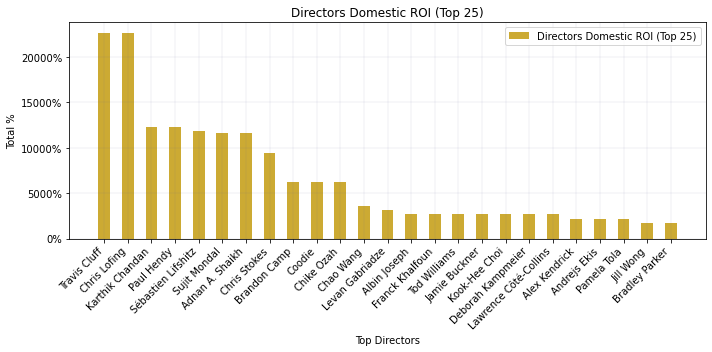

In [91]:
# establish x values for the visualization
# cite: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
labels = ROI_domestic_directors.index
x = np.arange(len(labels))

# set the plot, format, and labels
bar_width = 0.3
fig, ax = plt.subplots(figsize=(10,5))
ax1 = ax.bar(x, 
             ROI_domestic_directors.values,
             width = 0.5, 
             color = '#CCAA33', 
             label='Directors Domestic ROI (Top 25)')

ax.set_xticks(x)
ax.set_xticklabels(labels)
#ax.yaxis.set_major_formatter(plt.ticker.StrMethodFormatter('{x:,.0f}'))
plt.setp(ax.get_xticklabels(), rotation=45, ha='right') # cite: https://pythonguides.com/matplotlib-x-axis-label/
ax.grid(color='#666699', linestyle='-', linewidth=0.1)
ax.set_xlabel('Top Directors')
ax.set_ylabel('Total %')
xticks = mtick.FormatStrFormatter('%.0f%%')
ax.yaxis.set_major_formatter(xticks)

# Add title and legends
ax.set_title('Directors Domestic ROI (Top 25)')
ax.legend()

# format the layout and display the visualization
fig.tight_layout()
plt.show()

Visualize the ROI of top directors (global)

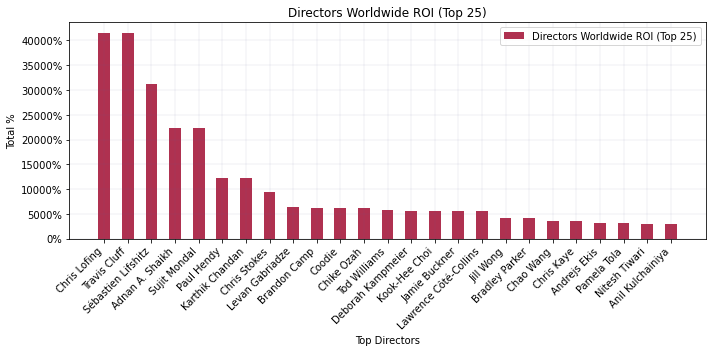

In [92]:
# establish x values for the visualization
# cite: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
labels = ROI_global_directors.index
x = np.arange(len(labels))

# set the plot, format, and labels
bar_width = 0.3
fig, ax = plt.subplots(figsize=(10,5))
ax1 = ax.bar(x, 
             ROI_global_directors.values,
             width = 0.5, 
             color = '#AF3150', 
             label='Directors Worldwide ROI (Top 25)')

ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right') # cite: https://pythonguides.com/matplotlib-x-axis-label/
ax.grid(color='#666699', linestyle='-', linewidth=0.1)
ax.set_xlabel('Top Directors')
ax.set_ylabel('Total %')
xticks = mtick.FormatStrFormatter('%.0f%%')
ax.yaxis.set_major_formatter(xticks)

# Add title and legends
ax.set_title('Directors Worldwide ROI (Top 25)')
ax.legend()

# format the layout and display the visualization
fig.tight_layout()
plt.show()

Above we were able to identify a list of directors who, regardless of genre, have proven themselves to be profitable. Note that this approach does not take into account the number of films a director has been involved with. Travis Cluff has only 9 director credits to his name, though his films have returned well. (cite: https://www.imdb.com/name/nm4000389/?ref_=fn_al_nm_1)

Below we will work to find the genres with the highest ROI when taking director into account.

In [93]:
# find the average budget by genre when taking into account directors
directors_genre_production_mean = round(directors_groupby.groupby('genres_split')['production_budget'].
                                   mean(), 0)

In [94]:
# find the average domestic gross sales by genre when taking into account directors
directors_genre_domestic_gross_mean = round(directors_groupby.groupby('genres_split')['domestic_gross']
                                      .mean(), 0)

In [95]:
# find the average global gross sales by genre when taking into account directors
directors_genre_global_gross_mean = round(directors_groupby.groupby('genres_split')['worldwide_gross'].
                                 mean(), 0)

In [96]:
# calculate the ROI by genre (domestic) when taking into account directors, only display the top 25
ROI_domestic_directors_genre = round(((directors_genre_domestic_gross_mean - directors_genre_production_mean) / 
                                 directors_genre_production_mean) * 100, 2).sort_values(ascending=False)

In [97]:
# calculate the ROI by genre (global) when taking into account directors, only display the top 25
ROI_global_directors_genre = round(((directors_genre_global_gross_mean - directors_genre_production_mean) / 
                                     directors_genre_production_mean) * 100, 2).sort_values(ascending=False)

Visualize the ROI of genres when taking into account directors (domestic)

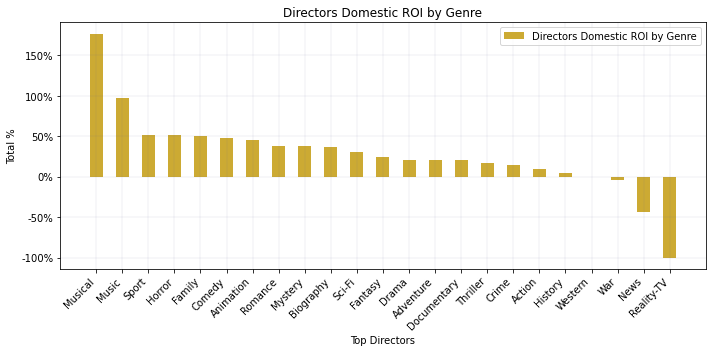

In [98]:
# establish x values for the visualization
# cite: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
labels = ROI_domestic_directors_genre.index
x = np.arange(len(labels))

# set the plot, format, and labels
bar_width = 0.3
fig, ax = plt.subplots(figsize=(10,5))
ax1 = ax.bar(x, 
             ROI_domestic_directors_genre.values,
             width = 0.5, 
             color = '#CCAA33', 
             label='Directors Domestic ROI by Genre')

ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right') # cite: https://pythonguides.com/matplotlib-x-axis-label/
ax.grid(color='#666699', linestyle='-', linewidth=0.1)
ax.set_xlabel('Top Directors')
ax.set_ylabel('Total %')
xticks = mtick.FormatStrFormatter('%.0f%%')
ax.yaxis.set_major_formatter(xticks)

# Add title and legends
ax.set_title('Directors Domestic ROI by Genre')
ax.legend()

# format the layout and display the visualization
fig.tight_layout()
plt.show()

Visualize the ROI of genres when taking into account directors (global)

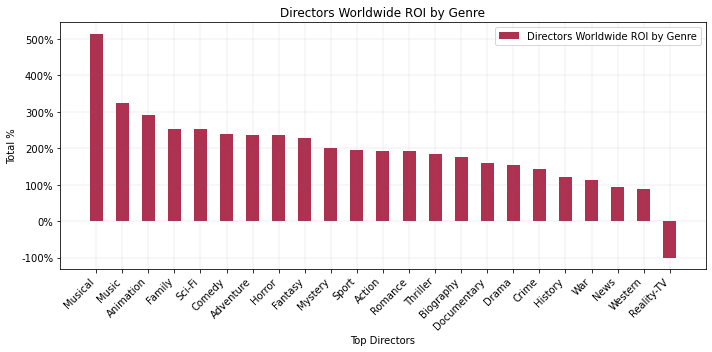

In [99]:
# establish x values for the visualization
# cite: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
labels = ROI_global_directors_genre.index
x = np.arange(len(labels))

# set the plot, format, and labels
bar_width = 0.3
fig, ax = plt.subplots(figsize=(10,5))
ax1 = ax.bar(x, 
             ROI_global_directors_genre.values,
             width = 0.5, 
             color = '#AF3150', 
             label='Directors Worldwide ROI by Genre')

ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right') # cite: https://pythonguides.com/matplotlib-x-axis-label/
ax.grid(color='#666699', linestyle='-', linewidth=0.1)
ax.set_xlabel('Top Directors')
ax.set_ylabel('Total %')
xticks = mtick.FormatStrFormatter('%.0f%%')
ax.yaxis.set_major_formatter(xticks)

# Add title and legends
ax.set_title('Directors Worldwide ROI by Genre')
ax.legend()

# format the layout and display the visualization
fig.tight_layout()
plt.show()

From the above visualizations we can see that when we take into account directors and look at the profitability of movies by genre Musical and Music films prevail with the highest ROI. Domestically, Family movies ranks third, globally, Animation movies rank third. For the duration of this analysis we will continue to look at Musical, Music, and Animation type films.

We will explore the top five directors for the top three genres below. First we will look at musical.

In [100]:
# from the directors list, group a list by only directors who have worked with musical films
category_type_musical = ['Musical']
directors_musical = directors_groupby[directors_groupby['genres_split'].isin(category_type_musical)]

In [101]:
# find the average budget for musical films
directors_musical_production_mean = round(directors_musical.groupby('primary_name')['production_budget'].
                                   mean(), 0)

In [102]:
# find the average domestic gross sales for musical films
directors_musical_domestic_gross_mean = round(directors_musical.groupby('primary_name')['domestic_gross']
                                      .mean(), 0)

In [103]:
# find the average global gross sales for musical films
directors_musical_global_gross_mean = round(directors_musical.groupby('primary_name')['worldwide_gross']
                                      .mean(), 0)

In [104]:
# calculate the ROI for musical films by director, only display the top 5 (domestic)
ROI_domestic_directors_musical = round(((directors_musical_domestic_gross_mean - directors_musical_production_mean) / 
                                 directors_musical_production_mean) * 100, 2).sort_values(ascending=False).nlargest(5)
ROI_domestic_directors_musical

primary_name
Steven Spielberg    628.33
Zane Burden         388.93
Bill Condon         388.93
Marilyn Barnes      388.93
Razvan Dinca        323.53
dtype: float64

In [105]:
# calculate the ROI for musical films by director, only display the top 5 (global)
ROI_global_directors_musical = round(((directors_musical_global_gross_mean - directors_musical_production_mean) / 
                                     directors_musical_production_mean) * 100, 2).sort_values(ascending=False).nlargest(5)
ROI_global_directors_musical

primary_name
Zane Burden       937.57
Bill Condon       937.57
Marilyn Barnes    937.57
Brad Dalton       715.26
Chance Taylor     715.26
dtype: float64

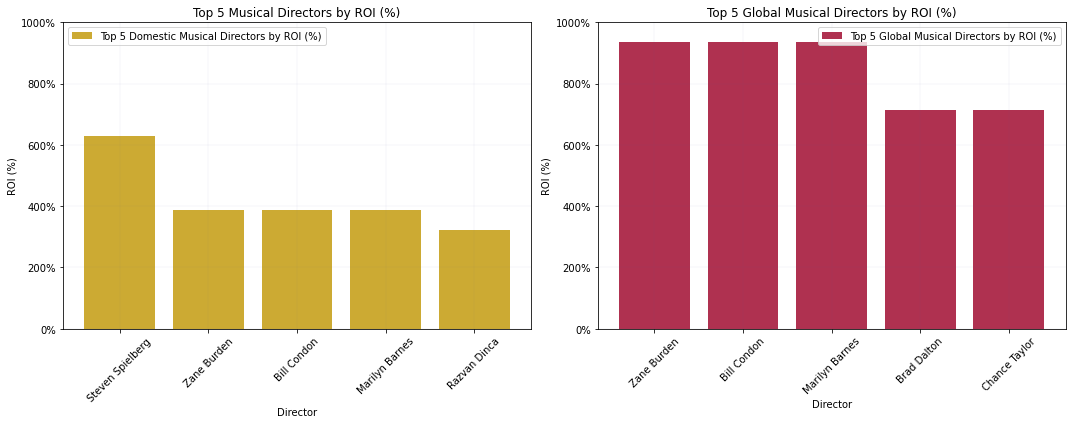

In [107]:
# plot a histogram to visualize directors with high ROI in the musical genre

# create the plot with 2 figures side by side
fig, (ax1, ax2) = plt.subplots(figsize=(15, 6), ncols = 2)

# set the plot, format, and labels for the first bar graph
ax1.bar(ROI_domestic_directors_musical.index, ROI_domestic_directors_musical.values,
       color = '#CCAA33', 
       align='center', 
       label = 'Top 5 Domestic Musical Directors by ROI (%)')
ax1.set_ylabel('ROI (%)')
ax1.set_xlabel('Director')
ax1.set_title('Top 5 Musical Directors by ROI (%)')
xticks = mtick.FormatStrFormatter('%.0f%%')
ax1.yaxis.set_major_formatter(xticks)
ax1.tick_params(axis='x', labelrotation=45)
major_ticks = np.arange(0, 1200, 200)
ax1.set_yticks(major_ticks)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right') # cite: https://pythonguides.com/matplotlib-x-axis-label/
ax1.grid(color='#666699', alpha = .5, linestyle='-', linewidth=0.1)
ax1.legend(loc='upper left')

# set the plot, format, and labels for the second bar graph
ax2.bar(ROI_global_directors_musical.index, ROI_global_directors_musical.values,
       color = '#AF3150', 
       align='center', 
       label = 'Top 5 Global Musical Directors by ROI (%)')
ax2.set_ylabel('ROI (%)')
ax2.set_xlabel('Director')
ax2.set_title('Top 5 Global Musical Directors by ROI (%)')
xticks = mtick.FormatStrFormatter('%.0f%%')
ax2.yaxis.set_major_formatter(xticks)
ax2.tick_params(axis='x', labelrotation=45)
major_ticks = np.arange(0, 1200, 200)
ax2.set_yticks(major_ticks)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right') # cite: https://pythonguides.com/matplotlib-x-axis-label/
ax2.grid(color='#666699', alpha = .5, linestyle='-', linewidth=0.1)
ax2.legend(loc = 'upper right')

# format the layout and display the graphs
fig.tight_layout()
plt.show()

# save figure to files
fig.savefig('/Users/laurenbrown/Documents/Flatiron/Phase_1/Project/Phase 1 Project_Lauren Brown/Images/Musical_Directors.png')

Now we will explore the top five directors for music films

In [108]:
# from the directors list, group a list by only directors who have worked with music films
category_type_music = ['Music']
directors_music = directors_groupby[directors_groupby['genres_split'].isin(category_type_music)]

In [109]:
# find the average budget for music films
directors_music_production_mean = round(directors_music.groupby('primary_name')['production_budget'].
                                   mean(), 0)

In [110]:
# find the average domestic gross sales for music films
directors_music_domestic_gross_mean = round(directors_music.groupby('primary_name')['domestic_gross']
                                      .mean(), 0)

In [111]:
# find the average global gross sales for music films
directors_music_global_gross_mean = round(directors_music.groupby('primary_name')['worldwide_gross']
                                      .mean(), 0)

In [112]:
# calculate the ROI for music films by director, only display the top 5 (domestic)
ROI_domestic_directors_music = round(((directors_music_domestic_gross_mean - directors_music_production_mean) / 
                                 directors_music_production_mean) * 100, 2).sort_values(ascending=False).nlargest(5)
ROI_domestic_directors_music

primary_name
Damien Chazelle       604.69
Anthony Nardolillo    551.12
Elizabeth Banks       535.50
Vanja Kovacevic       498.02
Geoffrey Cox          445.78
dtype: float64

In [113]:
# calculate the ROI for music films by director, only display the top 5 (global)
ROI_global_directors_music = round(((directors_music_global_gross_mean - directors_music_production_mean) / 
                                     directors_music_production_mean) * 100, 2).sort_values(ascending=False).nlargest(5)
ROI_global_directors_music

primary_name
Stephen Daldry     2085.07
Brett Sullivan     2085.07
Damien Chazelle    1897.08
Bryan Singer       1527.25
Vanja Kovacevic    1104.03
dtype: float64

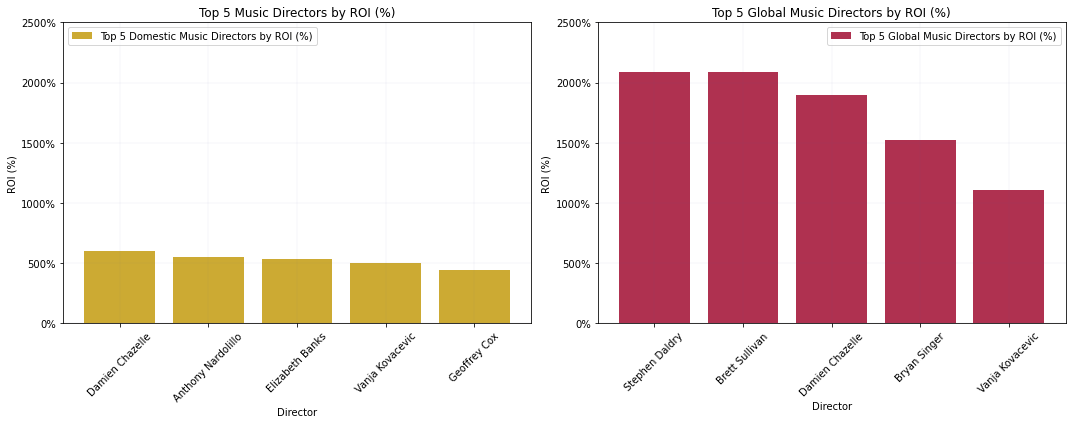

In [115]:
# plot a histogram to visualize directors with high ROI in the music genre

# create the plot with 2 figures side by side
fig, (ax1, ax2) = plt.subplots(figsize=(15, 6), ncols = 2)

# set the plot, format, and labels for the first bar graph
ax1.bar(ROI_domestic_directors_music.index, ROI_domestic_directors_music.values,
       color = '#CCAA33', 
       align='center', 
       label = 'Top 5 Domestic Music Directors by ROI (%)')
ax1.set_ylabel('ROI (%)')
ax1.set_xlabel('Director')
ax1.set_title('Top 5 Music Directors by ROI (%)')
xticks = mtick.FormatStrFormatter('%.0f%%')
ax1.yaxis.set_major_formatter(xticks)
ax1.tick_params(axis='x', labelrotation=45)
major_ticks = np.arange(0, 3000, 500)
ax1.set_yticks(major_ticks)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right') # cite: https://pythonguides.com/matplotlib-x-axis-label/
ax1.grid(color='#666699', alpha = .5, linestyle='-', linewidth=0.1)
ax1.legend(loc='upper left')

# set the plot, format, and labels for the second bar graph
ax2.bar(ROI_global_directors_music.index, ROI_global_directors_music.values,
       color = '#AF3150', 
       align='center', 
       label = 'Top 5 Global Music Directors by ROI (%)')
ax2.set_ylabel('ROI (%)')
ax2.set_xlabel('Director')
ax2.set_title('Top 5 Global Music Directors by ROI (%)')
xticks = mtick.FormatStrFormatter('%.0f%%')
ax2.yaxis.set_major_formatter(xticks)
ax2.tick_params(axis='x', labelrotation=45)
major_ticks = np.arange(0, 3000, 500)
ax2.set_yticks(major_ticks)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right') # cite: https://pythonguides.com/matplotlib-x-axis-label/
ax2.grid(color='#666699', alpha = .5, linestyle='-', linewidth=0.1)
ax2.legend(loc = 'upper right')

# format the layout and display the graphs
fig.tight_layout()
plt.show()

# save figure to files
fig.savefig('/Users/laurenbrown/Documents/Flatiron/Phase_1/Project/Phase 1 Project_Lauren Brown/Images/Music_Directors.png')

Now we will explore the top five directors for animation films

In [116]:
# from the directors list, group a list by only directors who have worked with animation films
category_type_animation= ['Animation']
directors_animation = directors_groupby[directors_groupby['genres_split'].isin(category_type_animation)]

In [117]:
# find the average budget for animation films
directors_animation_production_mean = round(directors_animation.groupby('primary_name')['production_budget'].
                                   mean(), 0)

In [118]:
# find the average domestic gross sales for animation films
directors_animation_domestic_gross_mean = round(directors_animation.groupby('primary_name')['domestic_gross']
                                      .mean(), 0)

In [119]:
# find the average global gross sales for animation films
directors_animation_global_gross_mean = round(directors_animation.groupby('primary_name')['worldwide_gross']
                                      .mean(), 0)

In [120]:
# calculate the ROI for animation films by director, only display the top 5 (domestic)
ROI_domestic_directors_animation = round(((directors_animation_domestic_gross_mean - directors_animation_production_mean) / 
                                 directors_animation_production_mean) * 100, 2).sort_values(ascending=False).nlargest(5)
ROI_domestic_directors_animation

primary_name
Karthik Chandan    12327.79
Jon Favreau          431.89
Yarrow Cheney        391.18
Greg Tiernan         330.96
Phil Lord            329.64
dtype: float64

In [121]:
# calculate the ROI for animation films by director, only display the top 5 (global)
ROI_global_directors_animation = round(((directors_animation_global_gross_mean - directors_animation_production_mean) / 
                                 directors_animation_production_mean) * 100, 2).sort_values(ascending=False).nlargest(5)
ROI_global_directors_animation

primary_name
Karthik Chandan     12327.79
Kyle Balda           1373.20
Tatsuya Nagamine     1344.09
Eric Guillon         1279.64
Jon Favreau          1143.65
dtype: float64

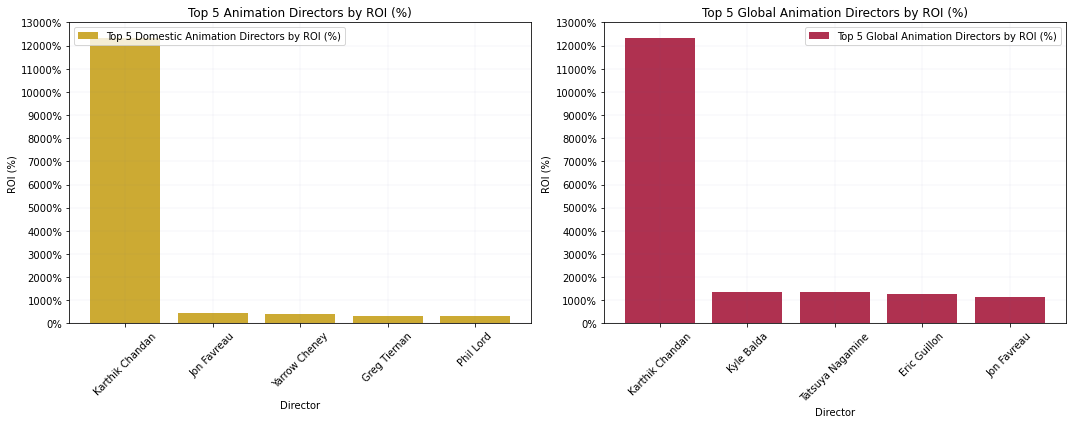

In [123]:
# plot a histogram to visualize directors with high ROI in the animation genre

# create the plot with 2 figures side by side
fig, (ax1, ax2) = plt.subplots(figsize=(15, 6), ncols = 2)

# set the plot, format, and labels for the first bar graph
ax1.bar(ROI_domestic_directors_animation.index, ROI_domestic_directors_animation.values,
       color = '#CCAA33', 
       align='center', 
       label = 'Top 5 Domestic Animation Directors by ROI (%)')
ax1.set_ylabel('ROI (%)')
ax1.set_xlabel('Director')
ax1.set_title('Top 5 Animation Directors by ROI (%)')
xticks = mtick.FormatStrFormatter('%.0f%%')
ax1.yaxis.set_major_formatter(xticks)
ax1.tick_params(axis='x', labelrotation=45)
major_ticks = np.arange(0, 14000, 1000)
ax1.set_yticks(major_ticks)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right') # cite: https://pythonguides.com/matplotlib-x-axis-label/
ax1.grid(color='#666699', alpha = .5, linestyle='-', linewidth=0.1)
ax1.legend(loc='upper left')

# set the plot, format, and labels for the second bar graph
ax2.bar(ROI_global_directors_animation.index, ROI_global_directors_animation.values,
       color = '#AF3150', 
       align='center', 
       label = 'Top 5 Global Animation Directors by ROI (%)')
ax2.set_ylabel('ROI (%)')
ax2.set_xlabel('Director')
ax2.set_title('Top 5 Global Animation Directors by ROI (%)')
xticks = mtick.FormatStrFormatter('%.0f%%')
ax2.yaxis.set_major_formatter(xticks)
ax2.tick_params(axis='x', labelrotation=45)
major_ticks = np.arange(0, 14000, 1000)
ax2.set_yticks(major_ticks)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right') # cite: https://pythonguides.com/matplotlib-x-axis-label/
ax2.grid(color='#666699', alpha = .5, linestyle='-', linewidth=0.1)
ax2.legend(loc = 'upper right')

# format the layout and display the graphs
fig.tight_layout()
plt.show()

# save figure to files
fig.savefig('/Users/laurenbrown/Documents/Flatiron/Phase_1/Project/Phase 1 Project_Lauren Brown/Images/Animation_Directors.png')

#### Writers

We will replicate the process used above to analyze directors as we look to better understand which writers to partner with.

In [124]:
# remove writers that have passed away
alive_writers = full_movie_details.loc[full_movie_details['death_year'].isnull()]
alive_writers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres,genres_split,category,primary_name,death_year,month,day
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,Horror,Horror,actress,Ai Hashimoto,NaN,12,18
1,1,2009-12-18,Avatar,425000000,760507625,2776345279,Horror,Horror,writer,Yûsuke Yamada,NaN,12,18
2,1,2009-12-18,Avatar,425000000,760507625,2776345279,Horror,Horror,actress,Rikako Sakata,NaN,12,18
3,1,2009-12-18,Avatar,425000000,760507625,2776345279,Horror,Horror,actress,Nako Mizusawa,NaN,12,18
4,1,2009-12-18,Avatar,425000000,760507625,2776345279,Horror,Horror,composer,Hideki Ikari,NaN,12,18


In [125]:
# from the full movie details dataset sort by writers
category_type_writer = ['writer']

writers_groupby =  alive_writers[alive_writers['category'].isin(category_type_writer)]
writers_groupby.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres,genres_split,category,primary_name,death_year,month,day
1,1,2009-12-18,Avatar,425000000,760507625,2776345279,Horror,Horror,writer,Yûsuke Yamada,NaN,12,18
9,1,2009-12-18,Avatar,425000000,760507625,2776345279,Horror,Horror,writer,Teruo Noguchi,NaN,12,18
13,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"Action,Adventure,Fantasy",Action,writer,Stuart Beattie,NaN,5,20
14,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"Action,Adventure,Fantasy",Action,writer,Ted Elliott,NaN,5,20
17,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,"Action,Adventure,Fantasy",Action,writer,Tim Powers,NaN,5,20


In [126]:
# find the average budget by writer
writers_production_mean = round(writers_groupby.groupby('primary_name')['production_budget'].
                                   mean(), 0)

In [127]:
# find the average domestic gross sales by writer
writers_domestic_gross_mean = round(writers_groupby.groupby('primary_name')['domestic_gross']
                                      .mean(), 0)

In [128]:
# find the average global gross sales by writer
writers_global_mean = round(writers_groupby.groupby('primary_name')['worldwide_gross'].
                                 mean(), 0)

In [129]:
# calculate the ROI by writer (domestic), only display the top 25
ROI_domestic_writers = round(((writers_domestic_gross_mean - writers_production_mean) / 
                                 writers_production_mean) * 100, 2).sort_values(ascending=False).nlargest(25)

In [130]:
# calculate the ROI by writer (global), only display the top 25
ROI_global_writers = round(((writers_global_mean - writers_production_mean) / 
                               writers_production_mean) * 100, 2).sort_values(ascending=False).nlargest(25)

Visualize the ROI of top writers (domestic)

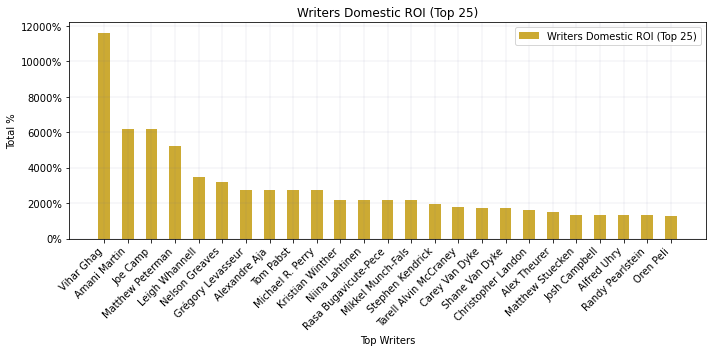

In [131]:
# establish x values for the visualization
# cite: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
labels = ROI_domestic_writers.index
x = np.arange(len(labels))

# set the plot, format, and labels
bar_width = 0.3
fig, ax = plt.subplots(figsize=(10,5))
ax1 = ax.bar(x, 
             ROI_domestic_writers.values,
             width = 0.5, 
             color = '#CCAA33', 
             label='Writers Domestic ROI (Top 25)')

ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right') # cite: https://pythonguides.com/matplotlib-x-axis-label/
ax.grid(color='#666699', linestyle='-', linewidth=0.1)
ax.set_xlabel('Top Writers')
ax.set_ylabel('Total %')
xticks = mtick.FormatStrFormatter('%.0f%%')
ax.yaxis.set_major_formatter(xticks)

# Add title and legends
ax.set_title('Writers Domestic ROI (Top 25)')
ax.legend()

# format the layout and display the visualization
fig.tight_layout()
plt.show()

Visualize the ROI of top writers (global)

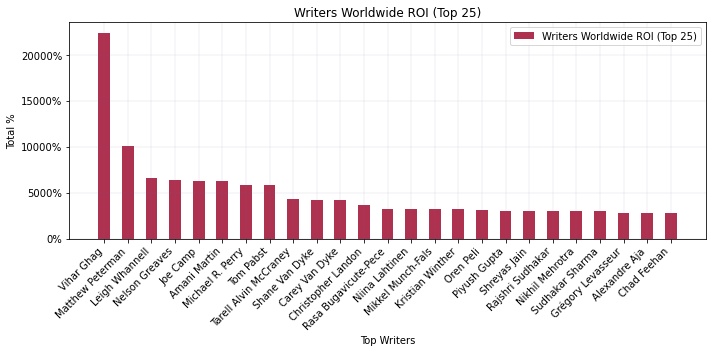

In [132]:
# establish x values for the visualization
# cite: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
labels = ROI_global_writers.index
x = np.arange(len(labels))

# set the plot, format, and labels
bar_width = 0.3
fig, ax = plt.subplots(figsize=(10,5))
ax1 = ax.bar(x, 
             ROI_global_writers.values,
             width = 0.5, 
             color = '#AF3150', 
             label='Writers Worldwide ROI (Top 25)')

ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right') # cite: https://pythonguides.com/matplotlib-x-axis-label/
ax.grid(color='#666699', linestyle='-', linewidth=0.1)
ax.set_xlabel('Top Writers')
ax.set_ylabel('Total %')
xticks = mtick.FormatStrFormatter('%.0f%%')
ax.yaxis.set_major_formatter(xticks)

# Add title and legends
ax.set_title('Writers Worldwide ROI (Top 25)')
ax.legend()

# format the layout and display the visualization
fig.tight_layout()
plt.show()

Above we were able to identify a list of Writers who, regardless of genre, have proven themselves to be profitable. Note that this approach does not take into account the number of films a writer has been involved with. Vihar Ghag has only 1 writer credit to his name, though his film has returned well. (cite: https://www.imdb.com/name/nm3358805/)

Below we will work to find the genres with the highest ROI when taking writer into account.

In [133]:
# find the average budget by genre when taking into account writers
writers_genre_production_mean = round(writers_groupby.groupby('genres_split')['production_budget'].
                                   mean(), 0)

In [134]:
# find the average domestic gross sales by genre when taking into account writers
writers_genre_domestic_gross_mean = round(writers_groupby.groupby('genres_split')['domestic_gross']
                                      .mean(), 0)

In [135]:
# find the average global gross sales by genre when taking into account writers
writers_genre_global_gross_mean = round(writers_groupby.groupby('genres_split')['worldwide_gross'].
                                 mean(), 0)

In [136]:
# calculate the ROI by genre (domestic) when taking into account writers, only display the top 25
ROI_domestic_writers_genre = round(((writers_genre_domestic_gross_mean - writers_genre_production_mean) / 
                                 writers_genre_production_mean) * 100, 2).sort_values(ascending=False)

In [137]:
# calculate the ROI by genre (global) when taking into account writers, only display the top 25
ROI_global_writers_genre = round(((writers_genre_global_gross_mean - writers_genre_production_mean) / 
                                     writers_genre_production_mean) * 100, 2).sort_values(ascending=False)

Visualize the ROI of genres when taking into account writers (domestic)

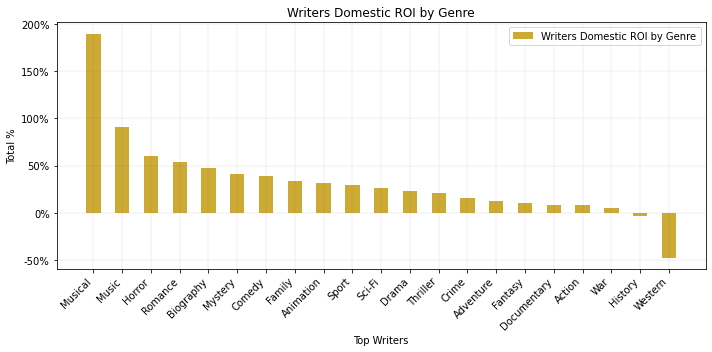

In [138]:
# establish x values for the visualization
# cite: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
labels = ROI_domestic_writers_genre.index
x = np.arange(len(labels))

# set the plot, format, and labels
bar_width = 0.3
fig, ax = plt.subplots(figsize=(10,5))
ax1 = ax.bar(x, 
             ROI_domestic_writers_genre.values,
             width = 0.5, 
             color = '#CCAA33', 
             label='Writers Domestic ROI by Genre')

ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right') # cite: https://pythonguides.com/matplotlib-x-axis-label/
ax.grid(color='#666699', linestyle='-', linewidth=0.1)
ax.set_xlabel('Top Writers')
ax.set_ylabel('Total %')
xticks = mtick.FormatStrFormatter('%.0f%%')
ax.yaxis.set_major_formatter(xticks)

# Add title and legends
ax.set_title('Writers Domestic ROI by Genre')
ax.legend()

# format the layout and display the visualization
fig.tight_layout()
plt.show()

Visualize the ROI of genres when taking into account writers (global)

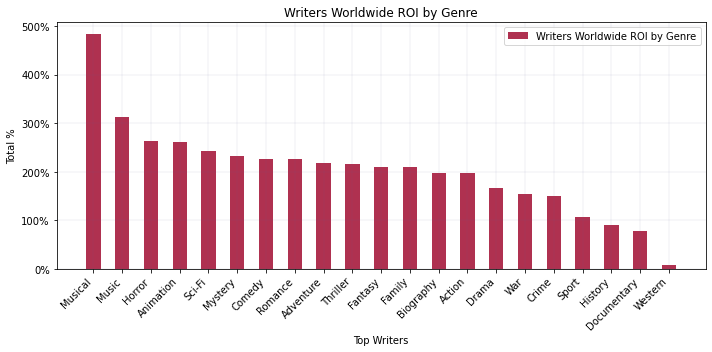

In [139]:
# establish x values for the visualization
# cite: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
labels = ROI_global_writers_genre.index
x = np.arange(len(labels))

# set the plot, format, and labels
bar_width = 0.3
fig, ax = plt.subplots(figsize=(10,5))
ax1 = ax.bar(x, 
             ROI_global_writers_genre.values,
             width = 0.5, 
             color = '#AF3150', 
             label='Writers Worldwide ROI by Genre')

ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right') # cite: https://pythonguides.com/matplotlib-x-axis-label/
ax.grid(color='#666699', linestyle='-', linewidth=0.1)
ax.set_xlabel('Top Writers')
ax.set_ylabel('Total %')
xticks = mtick.FormatStrFormatter('%.0f%%')
ax.yaxis.set_major_formatter(xticks)

# Add title and legends
ax.set_title('Writers Worldwide ROI by Genre')
ax.legend()

# format the layout and display the visualization
fig.tight_layout()
plt.show()

From the above visualizations we can see that when we take into account writers and look at the profitability of movies by genre Musical and Music films prevail with the highest ROI. Domestically, Horror movies ranks third, globally, Animation movies rank third. For the duration of this analysis we will continue to look at Musical, Music, and Animation type films.

We will explore the top five writers for the top three genres below. First we will look at musical.

In [140]:
# from the writers list, group a list by only writers who have worked with musical films
category_type_musical = ['Musical']
writers_musical = writers_groupby[writers_groupby['genres_split'].isin(category_type_musical)]

In [141]:
# find the average budget for musical films
writers_musical_production_mean = round(writers_musical.groupby('primary_name')['production_budget'].
                                   mean(), 0)

In [142]:
# find the average domestic gross sales for musical films
writers_musical_domestic_gross_mean = round(writers_musical.groupby('primary_name')['domestic_gross']
                                      .mean(), 0)

In [143]:
# find the average global gross sales for musical films
writers_musical_global_gross_mean = round(writers_musical.groupby('primary_name')['worldwide_gross']
                                      .mean(), 0)

In [144]:
# calculate the ROI for musical films by writer, only display the top 5 (domestic)
ROI_domestic_writers_musical = round(((writers_musical_domestic_gross_mean - writers_musical_production_mean) / 
                                 writers_musical_production_mean) * 100, 2).sort_values(ascending=False).nlargest(5)
ROI_domestic_writers_musical

primary_name
Tony Kushner           628.33
Stephen Chbosky        388.93
Evan Spiliotopoulos    388.93
Linda Woolverton       388.93
Ernest Fazekas         323.53
dtype: float64

In [145]:
# calculate the ROI for musical films by writer, only display the top 5 (global)
ROI_global_writers_musical = round(((writers_musical_global_gross_mean - writers_musical_production_mean) / 
                                     writers_musical_production_mean) * 100, 2).sort_values(ascending=False).nlargest(5)
ROI_global_writers_musical

primary_name
Stephen Chbosky        937.57
Evan Spiliotopoulos    937.57
Linda Woolverton       937.57
Tony Kushner           628.33
Paul Gordon            541.21
dtype: float64

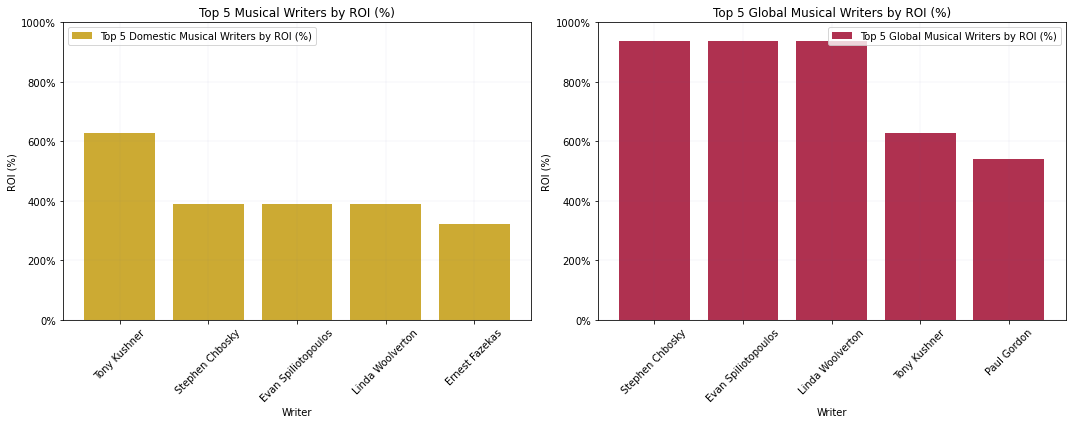

In [147]:
# plot a histogram to visualize writers with high ROI in the musical genre

# create the plot with 2 figures side by side
fig, (ax1, ax2) = plt.subplots(figsize=(15, 6), ncols = 2)

# set the plot, format, and labels for the first bar graph
ax1.bar(ROI_domestic_writers_musical.index, ROI_domestic_writers_musical.values,
       color = '#CCAA33', 
       align='center', 
       label = 'Top 5 Domestic Musical Writers by ROI (%)')
ax1.set_ylabel('ROI (%)')
ax1.set_xlabel('Writer')
ax1.set_title('Top 5 Musical Writers by ROI (%)')
xticks = mtick.FormatStrFormatter('%.0f%%')
ax1.yaxis.set_major_formatter(xticks)
major_ticks = np.arange(0, 1200, 200)
ax1.set_yticks(major_ticks)
ax1.tick_params(axis='x', labelrotation=45)
ax1.grid(color='#666699', alpha = .5, linestyle='-', linewidth=0.1)
ax1.legend(loc='upper left')

# set the plot, format, and labels for the second bar graph
ax2.bar(ROI_global_writers_musical.index, ROI_global_writers_musical.values,
       color = '#AF3150', 
       align='center', 
       label = 'Top 5 Global Musical Writers by ROI (%)')
ax2.set_ylabel('ROI (%)')
ax2.set_xlabel('Writer')
ax2.set_title('Top 5 Global Musical Writers by ROI (%)')
xticks = mtick.FormatStrFormatter('%.0f%%')
ax2.yaxis.set_major_formatter(xticks)
major_ticks = np.arange(0, 1200, 200)
ax2.set_yticks(major_ticks)
ax2.tick_params(axis='x', labelrotation=45)
ax2.grid(color='#666699', alpha = .5, linestyle='-', linewidth=0.1)
ax2.legend(loc = 'upper right')

# format the layout and display the graphs
fig.tight_layout()
plt.show()

# save figure to files
fig.savefig('/Users/laurenbrown/Documents/Flatiron/Phase_1/Project/Phase 1 Project_Lauren Brown/Images/Musical_Writers.png')

Now we will explore the top five Writers for music films

In [148]:
# from the writers list, group a list by only writers who have worked with music films
category_type_music = ['Music']
writers_music = writers_groupby[writers_groupby['genres_split'].isin(category_type_music)]

In [149]:
# find the average budget for music films
writers_music_production_mean = round(writers_music.groupby('primary_name')['production_budget'].
                                   mean(), 0)

In [150]:
# find the average domestic gross sales for music films
writers_music_domestic_gross_mean = round(writers_music.groupby('primary_name')['domestic_gross']
                                      .mean(), 0)

In [151]:
# find the average global gross sales for music films
writers_music_global_gross_mean = round(writers_music.groupby('primary_name')['worldwide_gross']
                                      .mean(), 0)

In [152]:
# calculate the ROI for music films by writer, only display the top 5 (domestic)
ROI_domestic_writers_music = round(((writers_music_domestic_gross_mean - writers_music_production_mean) / 
                                 writers_music_production_mean) * 100, 2).sort_values(ascending=False).nlargest(5)
ROI_domestic_writers_music

primary_name
Fred Lozano         551.12
Ahmadu Garba        551.12
Corey Deshon        551.12
Heidi McLaughlin    367.89
Gayle Forman        358.86
dtype: float64

In [153]:
# calculate the ROI for music films by writer, only display the top 5 (global)
ROI_global_writers_music = round(((writers_music_global_gross_mean - writers_music_production_mean) / 
                                     writers_music_production_mean) * 100, 2).sort_values(ascending=False).nlargest(5)
ROI_global_writers_music

primary_name
Anthony McCarten    1527.25
Peter Morgan        1527.25
Reid Carolin         752.83
Gayle Forman         612.33
Shauna Cross         612.33
dtype: float64

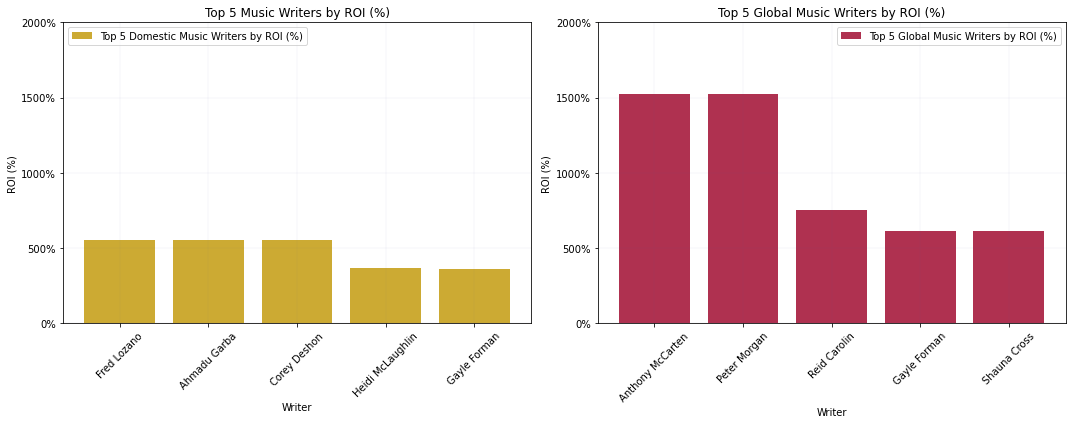

In [155]:
# plot a histogram to visualize writers with high ROI in the music genre

# create the plot with 2 figures side by side
fig, (ax1, ax2) = plt.subplots(figsize=(15, 6), ncols = 2)

# set the plot, format, and labels for the first bar graph
ax1.bar(ROI_domestic_writers_music.index, ROI_domestic_writers_music.values,
       color = '#CCAA33', 
       align='center', 
       label = 'Top 5 Domestic Music Writers by ROI (%)')
ax1.set_ylabel('ROI (%)')
ax1.set_xlabel('Writer')
ax1.set_title('Top 5 Music Writers by ROI (%)')
xticks = mtick.FormatStrFormatter('%.0f%%')
ax1.yaxis.set_major_formatter(xticks)
ax1.tick_params(axis='x', labelrotation=45)
major_ticks = np.arange(0, 2500, 500)
ax1.set_yticks(major_ticks)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right') # cite: https://pythonguides.com/matplotlib-x-axis-label/
ax1.grid(color='#666699', alpha = .5, linestyle='-', linewidth=0.1)
ax1.legend(loc='upper left')

# set the plot, format, and labels for the second bar graph
ax2.bar(ROI_global_writers_music.index, ROI_global_writers_music.values,
       color = '#AF3150', 
       align='center', 
       label = 'Top 5 Global Music Writers by ROI (%)')
ax2.set_ylabel('ROI (%)')
ax2.set_xlabel('Writer')
ax2.set_title('Top 5 Global Music Writers by ROI (%)')
xticks = mtick.FormatStrFormatter('%.0f%%')
ax2.yaxis.set_major_formatter(xticks)
ax2.tick_params(axis='x', labelrotation=45)
major_ticks = np.arange(0, 2500, 500)
ax2.set_yticks(major_ticks)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right') # cite: https://pythonguides.com/matplotlib-x-axis-label/
ax2.grid(color='#666699', alpha = .5, linestyle='-', linewidth=0.1)
ax2.legend(loc = 'upper right')

# format the layout and display the graphs
fig.tight_layout()
plt.show()

# save figure to files
fig.savefig('/Users/laurenbrown/Documents/Flatiron/Phase_1/Project/Phase 1 Project_Lauren Brown/Images/Music_Writers.png')

Now we will explore the top five directors for animation films

In [156]:
# from the writers list, group a list by only writers who have worked with animation films
category_type_animation= ['Animation']
writers_animation = writers_groupby[writers_groupby['genres_split'].isin(category_type_animation)]

In [157]:
# find the average budget for animation films
writers_animation_production_mean = round(writers_animation.groupby('primary_name')['production_budget'].
                                   mean(), 0)

In [158]:
# find the average domestic gross sales for animation films
writers_animation_domestic_gross_mean = round(writers_animation.groupby('primary_name')['domestic_gross']
                                      .mean(), 0)

In [159]:
# find the average global gross sales for animation films
writers_animation_global_gross_mean = round(writers_animation.groupby('primary_name')['worldwide_gross']
                                      .mean(), 0)

In [160]:
# calculate the ROI for animation films by writer, only display the top 5 (domestic)
ROI_domestic_writers_animation = round(((writers_animation_domestic_gross_mean - writers_animation_production_mean) / 
                                writers_animation_production_mean) * 100, 2).sort_values(ascending=False).nlargest(5)
ROI_domestic_writers_animation

primary_name
Linda Woolverton    431.89
Brenda Chapman      431.89
Jeff Nathanson      431.89
Evan Goldberg       414.05
Ariel Shaffir       414.05
dtype: float64

In [161]:
# calculate the ROI for animation films by writer, only display the top 5 (global)
ROI_global_writers_animation = round(((writers_animation_global_gross_mean - writers_animation_production_mean) / 
                                 writers_animation_production_mean) * 100, 2).sort_values(ascending=False).nlargest(5)
ROI_global_writers_animation

primary_name
Akira Toriyama      1344.09
Brenda Chapman      1143.65
Jeff Nathanson      1143.65
Linda Woolverton    1143.65
Jonathan Roberts     967.99
dtype: float64

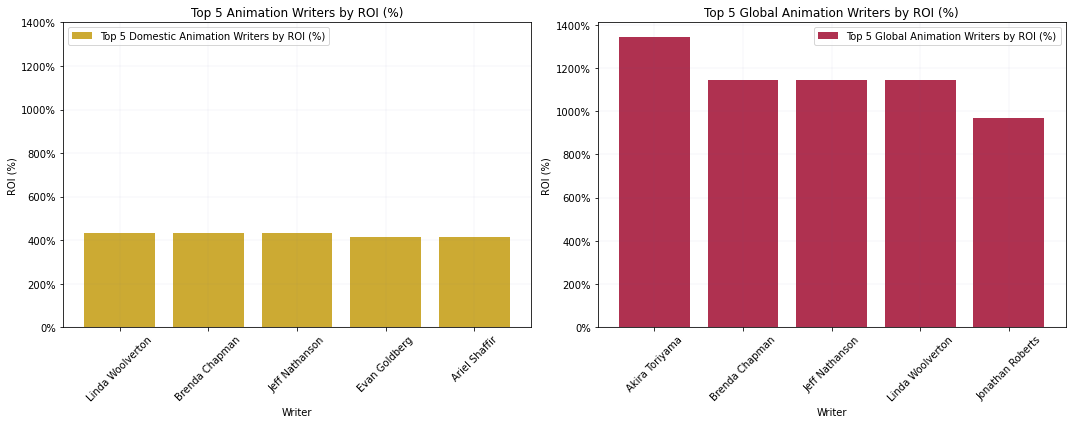

In [164]:
# plot a histogram to visualize writers with high ROI in the animation genre

# create the plot with 2 figures side by side
fig, (ax1, ax2) = plt.subplots(figsize=(15, 6), ncols = 2)

# set the plot, format, and labels for the first bar graph
ax1.bar(ROI_domestic_writers_animation.index, ROI_domestic_writers_animation.values,
       color = '#CCAA33', 
       align='center', 
       label = 'Top 5 Domestic Animation Writers by ROI (%)')
ax1.set_ylabel('ROI (%)')
ax1.set_xlabel('Writer')
ax1.set_title('Top 5 Animation Writers by ROI (%)')
xticks = mtick.FormatStrFormatter('%.0f%%')
ax1.yaxis.set_major_formatter(xticks)
ax1.tick_params(axis='x', labelrotation=45)
major_ticks = np.arange(0, 1600, 200)
ax1.set_yticks(major_ticks)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right') # cite: https://pythonguides.com/matplotlib-x-axis-label/
ax1.grid(color='#666699', alpha = .5, linestyle='-', linewidth=0.1)
ax1.legend(loc='upper left')

# set the plot, format, and labels for the second bar graph
ax2.bar(ROI_global_writers_animation.index, ROI_global_writers_animation.values,
       color = '#AF3150', 
       align='center', 
       label = 'Top 5 Global Animation Writers by ROI (%)')
ax2.set_ylabel('ROI (%)')
ax2.set_xlabel('Writer')
ax2.set_title('Top 5 Global Animation Writers by ROI (%)')
xticks = mtick.FormatStrFormatter('%.0f%%')
ax2.yaxis.set_major_formatter(xticks)
ax2.tick_params(axis='x', labelrotation=45)
major_ticks = np.arange(0, 1600, 200)
ax2.set_yticks(major_ticks)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right') # cite: https://pythonguides.com/matplotlib-x-axis-label/
ax2.grid(color='#666699', alpha = .5, linestyle='-', linewidth=0.1)
ax2.legend(loc = 'upper right')

# format the layout and display the graphs
fig.tight_layout()
plt.show()

# save figure to files
fig.savefig('/Users/laurenbrown/Documents/Flatiron/Phase_1/Project/Phase 1 Project_Lauren Brown/Images/Animation_Writers.png')

#### Recommendation

In an effort to mitigate risk, and possibly increase the likelihood of future profitability through return on investment, this analysis looked into which writers and directors in the most profitable genres had a portfolio that was also quite profitable. As you can see in the graphical representations above within the Musical, Music, and Animation genres, the top writers and directors have return on investments of incredible measure. Aligning with these partners who have a proven track record for success could lend itself to great market entry.

As Microsoft explores their approach towards entering the movie industry they should consider working with the following directors.
 - Musical
     - Zane Burden
     - Bill Condon
     - Marilyn Barnes
 - Music
     - Stephen Daldry
     - Brett Sullivan
     - Damien Chazelle
 - Animation
     - Karthik Chandan
     - Kyle Balda
     - Tatsuya Nagamine

As Microsoft explores their approach towards entering the movie industry they should consider working with the following writers.
 - Musical
     - Stephen Chbosky
     - Evan Spiliotopoulos
     - Linda Woolverton
 - Music
     - Anthony McCarten
     - Peter Morgan
     - Reid Carolin
 - Animation
     - Akira Toriyama
     - Brenda Chapman
     - Jeff Nathanson

### Business Recommendation 3: Be Strategic for Release Date

It is important to intimately understand the profitability of movies based on the timing of their release. In the below analysis we will look at movie release dates by month to see what time of year is the most profitable.

In [165]:
# look at the full movie details dataset to remind what information is available to us
full_movie_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69673 entries, 0 to 69672
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 69673 non-null  int64         
 1   release_date       69673 non-null  datetime64[ns]
 2   movie              69673 non-null  object        
 3   production_budget  69673 non-null  int64         
 4   domestic_gross     69673 non-null  int64         
 5   worldwide_gross    69673 non-null  int64         
 6   genres             69673 non-null  object        
 7   genres_split       69673 non-null  object        
 8   category           69649 non-null  object        
 9   primary_name       69644 non-null  object        
 10  death_year         1421 non-null   float64       
 11  month              69673 non-null  int64         
 12  day                69673 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(5)
memory 

In [166]:
# calculate return on investment by month (domestic)
full_movie_details['domestic_roi'] = ((full_movie_details['domestic_gross'] 
                                      - full_movie_details['production_budget']) / full_movie_details['production_budget']) * 100

In [167]:
# calculate return on investment by month (global)
full_movie_details['global_roi'] = ((full_movie_details['worldwide_gross'] 
                                      - full_movie_details['production_budget']) / full_movie_details['production_budget']) * 100

In [168]:
# check to ensure the domestic and global ROI columns have been added to the dataset
full_movie_details.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres,genres_split,category,primary_name,death_year,month,day,domestic_roi,global_roi
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,Horror,Horror,actress,Ai Hashimoto,NaN,12,18,78.942971,553.257713
1,1,2009-12-18,Avatar,425000000,760507625,2776345279,Horror,Horror,writer,Yûsuke Yamada,NaN,12,18,78.942971,553.257713
2,1,2009-12-18,Avatar,425000000,760507625,2776345279,Horror,Horror,actress,Rikako Sakata,NaN,12,18,78.942971,553.257713
3,1,2009-12-18,Avatar,425000000,760507625,2776345279,Horror,Horror,actress,Nako Mizusawa,NaN,12,18,78.942971,553.257713
4,1,2009-12-18,Avatar,425000000,760507625,2776345279,Horror,Horror,composer,Hideki Ikari,NaN,12,18,78.942971,553.257713


In [169]:
# drop unused columns for easier sorting
movie_details_temp = full_movie_details.drop(columns = ['genres', 'genres_split', 'category', 
                    'primary_name'], inplace=True )

#### Exploring Profitability by Month

In [170]:
# look at the fulll movie details list to ensure those columns have been removed
full_movie_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69673 entries, 0 to 69672
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 69673 non-null  int64         
 1   release_date       69673 non-null  datetime64[ns]
 2   movie              69673 non-null  object        
 3   production_budget  69673 non-null  int64         
 4   domestic_gross     69673 non-null  int64         
 5   worldwide_gross    69673 non-null  int64         
 6   death_year         1421 non-null   float64       
 7   month              69673 non-null  int64         
 8   day                69673 non-null  int64         
 9   domestic_roi       69673 non-null  float64       
 10  global_roi         69673 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(6), object(1)
memory usage: 6.4+ MB


In [171]:
# drop duplicates in full_movie_details, since genre_split can have movies duplicated on multiple lines
full_movie_details_unique = full_movie_details.drop_duplicates()

In [172]:
# look at the fulll movie details list to ensure those rows have been removed
full_movie_details_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2911 entries, 0 to 69658
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2911 non-null   int64         
 1   release_date       2911 non-null   datetime64[ns]
 2   movie              2911 non-null   object        
 3   production_budget  2911 non-null   int64         
 4   domestic_gross     2911 non-null   int64         
 5   worldwide_gross    2911 non-null   int64         
 6   death_year         548 non-null    float64       
 7   month              2911 non-null   int64         
 8   day                2911 non-null   int64         
 9   domestic_roi       2911 non-null   float64       
 10  global_roi         2911 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(6), object(1)
memory usage: 272.9+ KB


In [173]:
# find the average ROI by moth (domestic)
month_ROI_domestic = full_movie_details_unique.groupby('month')['domestic_roi'].mean()
month_ROI_domestic

month
1     152.717233
2     201.157949
3      37.308967
4      80.386971
5      86.415330
6      79.994468
7     185.562611
8     108.834335
9      27.331331
10    227.305671
11    155.105782
12     44.739185
Name: domestic_roi, dtype: float64

In [174]:
# find the average ROI by moth (global)
month_ROI_global = full_movie_details_unique.groupby('month')['global_roi'].mean()
month_ROI_global

month
1     357.001752
2     420.289962
3     147.577041
4     356.763713
5     233.775751
6     246.701981
7     455.389762
8     298.559062
9     151.981236
10    510.736383
11    370.732280
12    163.846499
Name: global_roi, dtype: float64

Visualize the ROI by month (domestic)

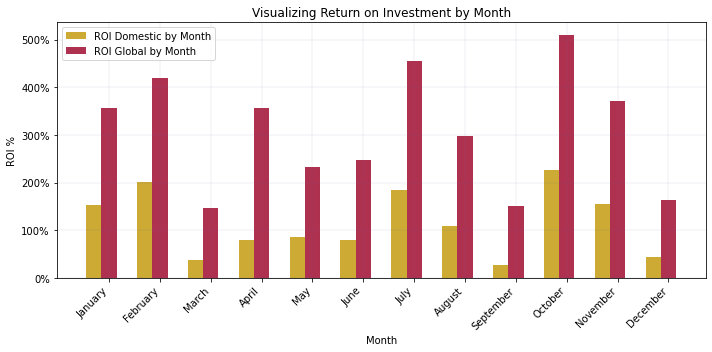

In [176]:
# establish x values for a multi dataset visualization
# cite: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
labels = 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'
x = np.arange(len(labels))

# set the plot, format, and labels
fig, ax = plt.subplots(figsize=(10,5))
bar_width = 0.3
ax1 = ax.bar(x - bar_width / 2, 
             month_ROI_domestic.values, 
             width = 0.3, 
             color = '#CCAA33',
             label ='ROI Domestic by Month')  
        
ax2 = ax.bar(x + bar_width / 2, 
             month_ROI_global.values, 
             width = 0.3, 
             color = '#AF3150',
             label='ROI Global by Month')

# Add a legend to the plot
ax.tick_params(axis='x')
ax.grid(color='#666699', linestyle='-', linewidth=0.1)
ax.set_xlabel('Month')
plt.setp(ax.get_xticklabels(), rotation=45, ha='right') # cite: https://pythonguides.com/matplotlib-x-axis-label/
xticks = mtick.FormatStrFormatter('%.0f%%')
ax.yaxis.set_major_formatter(xticks)
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(labels)
ax.set_ylabel('ROI %')

# Add title and legends
ax.legend()
ax.set_title('Visualizing Return on Investment by Month')

# format the layout and display the visualization
fig.tight_layout()
plt.show()

# save figure to files
fig.savefig('/Users/laurenbrown/Documents/Flatiron/Phase_1/Project/Phase 1 Project_Lauren Brown/Images/Month.png')

#### Exploring Profitability by Days in July

As we can see from the analysis above, that July has prevailed as the most profitable month to release a film domestically and globally. We will explore the specific dates within July to better understand details about the month of July's profitability. 

In [177]:
# from the full movie details dataset sort by July
category_type_july = ['7']

july = full_movie_details_unique[full_movie_details_unique['month'].isin(category_type_july)]
july.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,death_year,month,day,domestic_roi,global_roi
190,11,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,NaN,7,20,62.959672,294.341491
192,11,2012-07-20,The Dark Knight Rises,275000000,448139099,1084439099,1998.0,7,20,62.959672,294.341491
240,13,2013-07-02,The Lone Ranger,275000000,89302115,260002115,NaN,7,2,-67.526504,-5.453776
610,31,2012-07-03,The Amazing Spider-Man,220000000,262030663,757890267,2018.0,7,3,19.104847,244.495576
611,31,2012-07-03,The Amazing Spider-Man,220000000,262030663,757890267,NaN,7,3,19.104847,244.495576


In [178]:
# find the average ROI for each day of the month of July (domestic)
july_by_day_domestic = july.groupby('day')['domestic_roi'].mean()
july_by_day_domestic

day
1       22.618996
2      114.130795
3      166.421642
4      434.528808
5      222.697695
6      230.332425
7      278.596596
8       82.351665
9      153.699717
10    5708.886406
11      11.474374
12     275.174417
13     177.903708
14     -25.858673
15     -36.799221
16      -3.821671
17      42.403579
18     147.657158
19      40.187432
20     118.390467
21      46.608147
22     195.308755
23     -24.515224
24       7.233858
25      17.025675
26       9.771496
27      -3.564565
28      14.838179
29      50.639648
30     -51.802084
31     -13.390312
Name: domestic_roi, dtype: float64

In [179]:
# find the average ROI for each day of the month of July (global)
july_by_day_global = july.groupby('day')['global_roi'].mean()
july_by_day_global

day
1       129.658696
2       198.548201
3       351.219622
4       950.902346
5       328.231184
6       453.829103
7       575.989420
8       262.235390
9       403.150628
10    10723.237122
11      173.722281
12      380.811010
13      555.184639
14       89.551643
15       40.337663
16      165.849718
17      246.677311
18      371.313050
19      240.662617
20      279.632610
21      160.014565
22      535.866366
23        7.359159
24      157.969542
25      222.046241
26      147.878315
27      131.325862
28      152.662843
29      271.691824
30      -23.399612
31       55.590720
Name: global_roi, dtype: float64

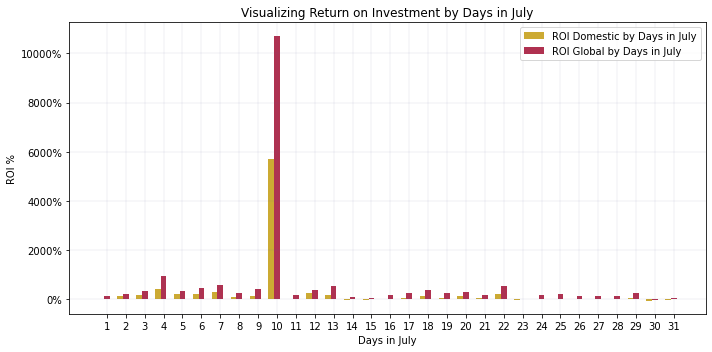

In [180]:
# establish x values for a multi dataset visualization
# cite: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
labels = july_by_day_domestic.index
x = np.arange(len(labels))

# set the plot, format, and labels
fig, ax = plt.subplots(figsize=(10,5))
bar_width = 0.3
ax1 = ax.bar(x - bar_width / 2, 
             july_by_day_domestic.values, 
             width = 0.3, 
             color = '#CCAA33',
             label ='ROI Domestic by Days in July')  
        
ax2 = ax.bar(x + bar_width / 2, 
             july_by_day_global.values, 
             width = 0.3, 
             color = '#AF3150',
             label='ROI Global by Days in July')

# Add a legend to the plot
ax.tick_params(axis='x')
ax.grid(color='#666699', linestyle='-', linewidth=0.1)
ax.set_xlabel('Days in July')
xticks = mtick.FormatStrFormatter('%.0f%%')
ax.yaxis.set_major_formatter(xticks)
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(labels)
ax.set_ylabel('ROI %')

# Add title and legends
ax.legend()
ax.set_title('Visualizing Return on Investment by Days in July')

# format the layout and display the visualization
fig.tight_layout()
plt.show()

# save figure to files
fig.savefig('/Users/laurenbrown/Documents/Flatiron/Phase_1/Project/Phase 1 Project_Lauren Brown/Images/Day.png')

#### Recommendation

Another aspect of the successful launch of Microsoft's entry into the movie industry is to understand, with confidence, when to release a film. As can be expect, there are seasonal impacts to a film's success. This analysis worked to understand what time of year is more ideal than others to release a film. As represented above, we now understand that the most profitable month that a film can be released, in terms of average return on investment, is in July. 

As we learned from further analysis, of all days in July, the 10th day of the month has proved to be the most profitable day to release a film.



## Conclusion

As shared in the detailed analysis above, there are 3 strategic recommendations for potentially profitable entry into the movie industry:

1. Pursue creating movies that fall into the genres of greatest profitability: Musical, Music, and Animation
2. Collaborate with highly profitable writers and directors within the profitable genres outlined in recommendation 1.
3. Release films during the most profitable time of year, which is July. In particular July 10 is the most profitable day to release a film.